# Unsupervised Learning: Trade & Ahead

## Problem Statement

### Context

The stock market has consistently proven to be a good place to invest in and save for the future. There are a lot of compelling reasons to invest in stocks. It can help in fighting inflation, create wealth, and also provides some tax benefits. Good steady returns on investments over a long period of time can also grow a lot more than seems possible. Also, thanks to the power of compound interest, the earlier one starts investing, the larger the corpus one can have for retirement. Overall, investing in stocks can help meet life's financial aspirations.

It is important to maintain a diversified portfolio when investing in stocks in order to maximise earnings under any market condition. Having a diversified portfolio tends to yield higher returns and face lower risk by tempering potential losses when the market is down. It is often easy to get lost in a sea of financial metrics to analyze while determining the worth of a stock, and doing the same for a multitude of stocks to identify the right picks for an individual can be a tedious task. By doing a cluster analysis, one can identify stocks that exhibit similar characteristics and ones which exhibit minimum correlation. This will help investors better analyze stocks across different market segments and help protect against risks that could make the portfolio vulnerable to losses.


### Objective

Trade&Ahead is a financial consultancy firm who provide their customers with personalized investment strategies. They have hired you as a Data Scientist and provided you with data comprising stock price and some financial indicators for a few companies listed under the New York Stock Exchange. They have assigned you the tasks of analyzing the data, grouping the stocks based on the attributes provided, and sharing insights about the characteristics of each group.

### Data Dictionary

- Ticker Symbol: An abbreviation used to uniquely identify publicly traded shares of a particular stock on a particular stock market
- Company: Name of the company
- GICS Sector: The specific economic sector assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- GICS Sub Industry: The specific sub-industry group assigned to a company by the Global Industry Classification Standard (GICS) that best defines its business operations
- Current Price: Current stock price in dollars
- Price Change: Percentage change in the stock price in 13 weeks
- Volatility: Standard deviation of the stock price over the past 13 weeks
- ROE: A measure of financial performance calculated by dividing net income by shareholders' equity (shareholders' equity is equal to a company's assets minus its debt)
- Cash Ratio: The ratio of a  company's total reserves of cash and cash equivalents to its total current liabilities
- Net Cash Flow: The difference between a company's cash inflows and outflows (in dollars)
- Net Income: Revenues minus expenses, interest, and taxes (in dollars)
- Earnings Per Share: Company's net profit divided by the number of common shares it has outstanding (in dollars)
- Estimated Shares Outstanding: Company's stock currently held by all its shareholders
- P/E Ratio: Ratio of the company's current stock price to the earnings per share
- P/B Ratio: Ratio of the company's stock price per share by its book value per share (book value of a company is the net difference between that company's total assets and total liabilities)

## Importing necessary libraries and data

In [3]:
#!pip install yellowbrick

In [4]:
import pandas as pd
import numpy as np

import matplotlib.pylab as plt

import seaborn as sns
from sklearn.model_selection  import train_test_split
from sklearn.cluster import KMeans

# to scale the data using z-score
from sklearn.preprocessing import StandardScaler

# to compute distances
from scipy.spatial.distance import cdist

# to perform k-means clustering and compute silhouette scores
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# to visualize the elbow curve and silhouette scores
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

from scipy.cluster.hierarchy import linkage, cophenet
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

# Avoid warnings
import warnings
warnings.filterwarnings('ignore')

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [5]:
#Importing data into a dataframe
data = pd.read_csv("stock_data.csv")
# Copying data to a second dataframe to avoid modifying the first one
df = data.copy()

## Data Overview

- Observations
- Sanity checks

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 340 entries, 0 to 339
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticker Symbol                 340 non-null    object 
 1   Security                      340 non-null    object 
 2   GICS Sector                   340 non-null    object 
 3   GICS Sub Industry             340 non-null    object 
 4   Current Price                 340 non-null    float64
 5   Price Change                  340 non-null    float64
 6   Volatility                    340 non-null    float64
 7   ROE                           340 non-null    int64  
 8   Cash Ratio                    340 non-null    int64  
 9   Net Cash Flow                 340 non-null    int64  
 10  Net Income                    340 non-null    int64  
 11  Earnings Per Share            340 non-null    float64
 12  Estimated Shares Outstanding  340 non-null    float64
 13  P/E R

In [7]:
print(f'The dataset has {df.shape[0]} rows and {df.shape[1]} columns.')

The dataset has 340 rows and 15 columns.


In [8]:
df.head(5)

Ticker Symbol                 Security             GICS Sector  \
0           AAL  American Airlines Group             Industrials   
1          ABBV                   AbbVie             Health Care   
2           ABT      Abbott Laboratories             Health Care   
3          ADBE        Adobe Systems Inc  Information Technology   
4           ADI     Analog Devices, Inc.  Information Technology   

       GICS Sub Industry  Current Price  Price Change  Volatility  ROE  \
0               Airlines      42.349998      9.999995    1.687151  135   
1        Pharmaceuticals      59.240002      8.339433    2.197887  130   
2  Health Care Equipment      44.910000     11.301121    1.273646   21   
3   Application Software      93.940002     13.977195    1.357679    9   
4         Semiconductors      55.320000     -1.827858    1.701169   14   

   Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
0          51     -604000000  7610000000               11.39   
1          77       51000000  5144000000                3.15   
2          67      938000000  4423000000                2.94   
3         180     -240840000   629551000                1.26   
4         272      315120000   696878000                0.31   

   Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
0                  6.681299e+08    3.718174  -8.784219  
1                  1.633016e+09   18.806350  -8.750068  
2                  1.504422e+09   15.275510  -0.394171  
3                  4.996437e+08   74.555557   4.199651  
4                  2.247994e+09  178.451613   1.059810

In [9]:
df.tail(5)

Ticker Symbol                Security             GICS Sector  \
335          YHOO              Yahoo Inc.  Information Technology   
336           YUM         Yum! Brands Inc  Consumer Discretionary   
337           ZBH  Zimmer Biomet Holdings             Health Care   
338          ZION           Zions Bancorp              Financials   
339           ZTS                  Zoetis             Health Care   

                GICS Sub Industry  Current Price  Price Change  Volatility  \
335  Internet Software & Services      33.259998     14.887727    1.845149   
336                   Restaurants      52.516175     -8.698917    1.478877   
337         Health Care Equipment     102.589996      9.347683    1.404206   
338                Regional Banks      27.299999     -1.158588    1.468176   
339               Pharmaceuticals      47.919998     16.678836    1.610285   

     ROE  Cash Ratio  Net Cash Flow  Net Income  Earnings Per Share  \
335   15         459    -1032187000 -4359082000               -4.64   
336  142          27      159000000  1293000000                2.97   
337    1         100      376000000   147000000                0.78   
338    4          99      -43623000   309471000                1.20   
339   32          65      272000000   339000000                0.68   

     Estimated Shares Outstanding   P/E Ratio  P/B Ratio  
335                   939457327.6   28.976191   6.261775  
336                   435353535.4   17.682214  -3.838260  
337                   188461538.5  131.525636 -23.884449  
338                   257892500.0   22.749999  -0.063096  
339                   498529411.8   70.470585   1.723068

There is some data that contains text in our data frame, these columns are not going to be used in our analysis but are going to be included at the end of the project to link a name with an specific category/cluster/group.

In [10]:
df.describe().T

count          mean           std           min  \
Current Price                 340.0  8.086234e+01  9.805509e+01  4.500000e+00   
Price Change                  340.0  4.078194e+00  1.200634e+01 -4.712969e+01   
Volatility                    340.0  1.525976e+00  5.917984e-01  7.331632e-01   
ROE                           340.0  3.959706e+01  9.654754e+01  1.000000e+00   
Cash Ratio                    340.0  7.002353e+01  9.042133e+01  0.000000e+00   
Net Cash Flow                 340.0  5.553762e+07  1.946365e+09 -1.120800e+10   
Net Income                    340.0  1.494385e+09  3.940150e+09 -2.352800e+10   
Earnings Per Share            340.0  2.776662e+00  6.587779e+00 -6.120000e+01   
Estimated Shares Outstanding  340.0  5.770283e+08  8.458496e+08  2.767216e+07   
P/E Ratio                     340.0  3.261256e+01  4.434873e+01  2.935451e+00   
P/B Ratio                     340.0 -1.718249e+00  1.396691e+01 -7.611908e+01   

                                       25%           50%           75%  \
Current Price                 3.855500e+01  5.970500e+01  9.288000e+01   
Price Change                 -9.394838e-01  4.819505e+00  1.069549e+01   
Volatility                    1.134878e+00  1.385593e+00  1.695549e+00   
ROE                           9.750000e+00  1.500000e+01  2.700000e+01   
Cash Ratio                    1.800000e+01  4.700000e+01  9.900000e+01   
Net Cash Flow                -1.939065e+08  2.098000e+06  1.698108e+08   
Net Income                    3.523012e+08  7.073360e+08  1.899000e+09   
Earnings Per Share            1.557500e+00  2.895000e+00  4.620000e+00   
Estimated Shares Outstanding  1.588482e+08  3.096751e+08  5.731175e+08   
P/E Ratio                     1.504465e+01  2.081988e+01  3.176476e+01   
P/B Ratio                    -4.352056e+00 -1.067170e+00  3.917066e+00   

                                       max  
Current Price                 1.274950e+03  
Price Change                  5.505168e+01  
Volatility                    4.580042e+00  
ROE                           9.170000e+02  
Cash Ratio                    9.580000e+02  
Net Cash Flow                 2.076400e+10  
Net Income                    2.444200e+10  
Earnings Per Share            5.009000e+01  
Estimated Shares Outstanding  6.159292e+09  
P/E Ratio                     5.280391e+02  
P/B Ratio                     1.290646e+02

There is no missing data on the dataset.

There is some spaces (" ") in the names of the columns so it would improve the code and readability to change those spaces to a lower hyphen. 

In [11]:
# fixing column names
df.columns = [c.replace(" ", "_") for c in df.columns]

In [12]:
df.head(3)

Ticker_Symbol                 Security  GICS_Sector      GICS_Sub_Industry  \
0           AAL  American Airlines Group  Industrials               Airlines   
1          ABBV                   AbbVie  Health Care        Pharmaceuticals   
2           ABT      Abbott Laboratories  Health Care  Health Care Equipment   

   Current_Price  Price_Change  Volatility  ROE  Cash_Ratio  Net_Cash_Flow  \
0      42.349998      9.999995    1.687151  135          51     -604000000   
1      59.240002      8.339433    2.197887  130          77       51000000   
2      44.910000     11.301121    1.273646   21          67      938000000   

   Net_Income  Earnings_Per_Share  Estimated_Shares_Outstanding  P/E_Ratio  \
0  7610000000               11.39                  6.681299e+08   3.718174   
1  5144000000                3.15                  1.633016e+09  18.806350   
2  4423000000                2.94                  1.504422e+09  15.275510   

   P/B_Ratio  
0  -8.784219  
1  -8.750068  
2  -0.394171

## Exploratory Data Analysis (EDA)

- EDA is an important part of any project involving data.
- It is important to investigate and understand the data better before building a model with it.
- A few questions have been mentioned below which will help you approach the analysis in the right manner and generate insights from the data.
- A thorough analysis of the data, in addition to the questions mentioned below, should be done.

### Univariate Analysis

In [13]:
# function to plot a boxplot and a histogram along the same scale.


def histogram_boxplot(data, feature, figsize=(12, 7), kde=False, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (12,7))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

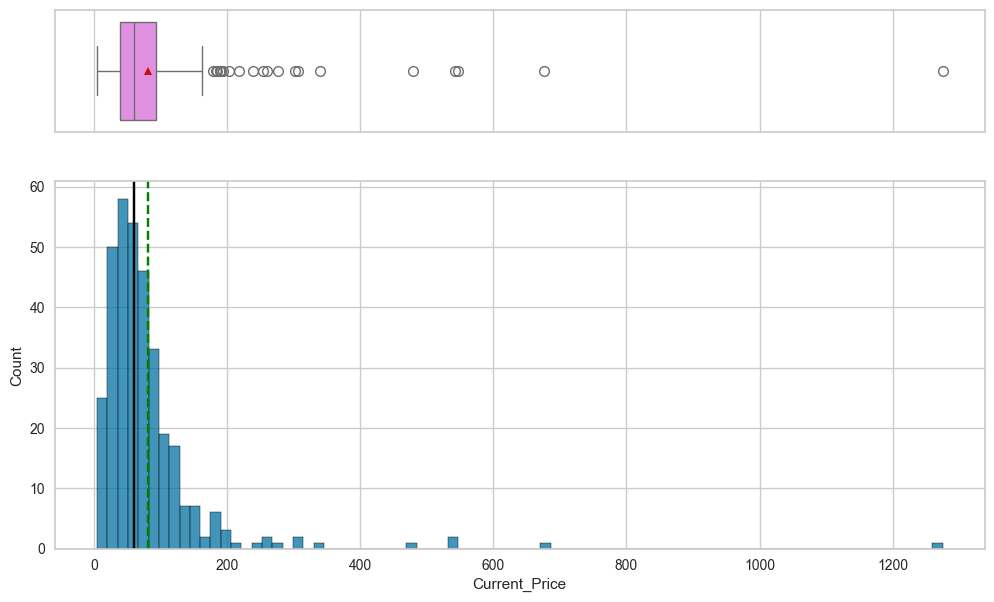

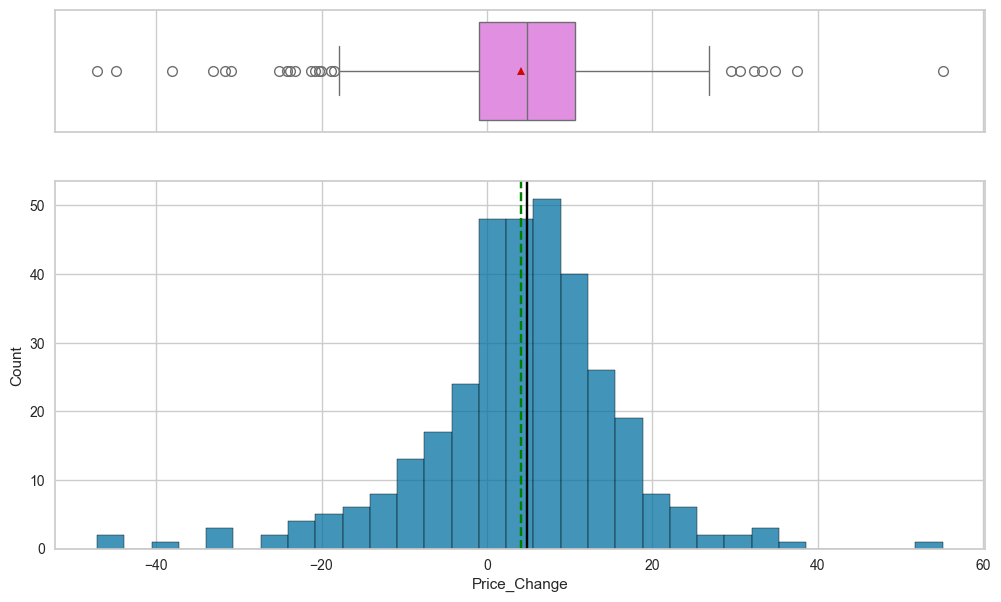

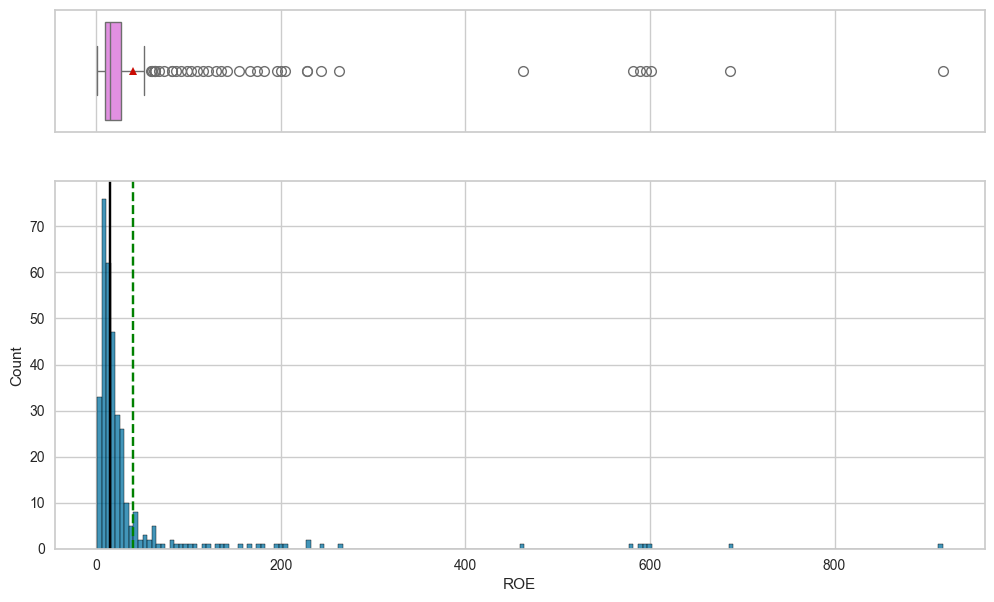

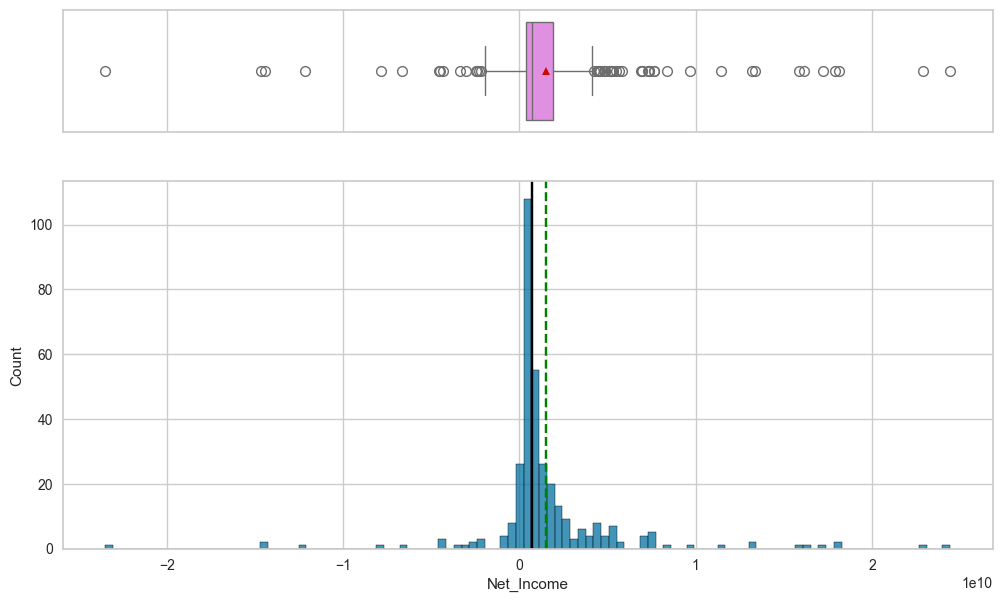

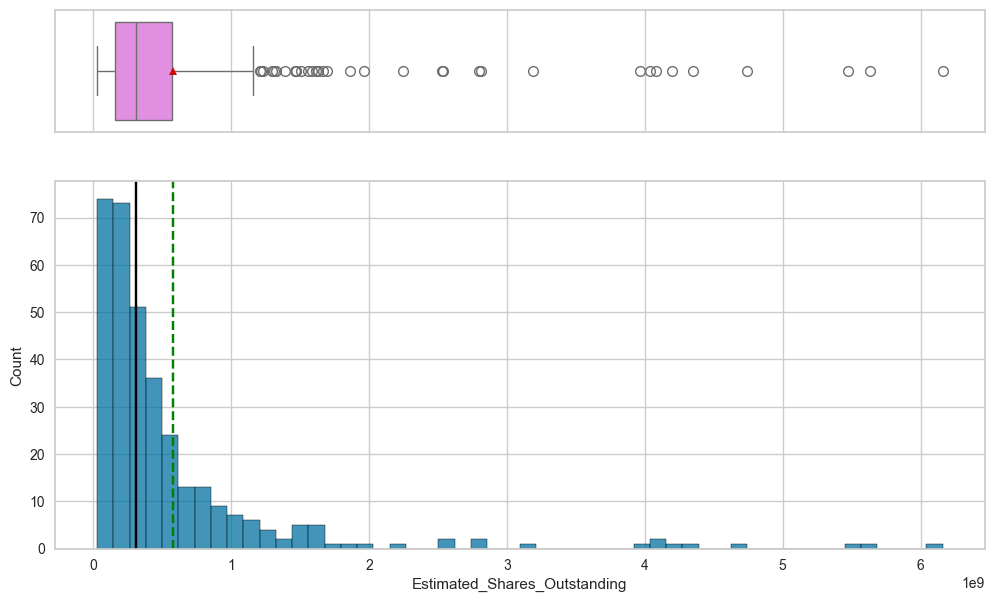

In [14]:
# selecting numerical columns
num_col = df.select_dtypes(include=np.number).columns.tolist()

for item in num_col:
    histogram_boxplot(df, item)

### Bivariate analysis

In [15]:
sns.pairplot(df, diag_kind='kde');

<Axes: >

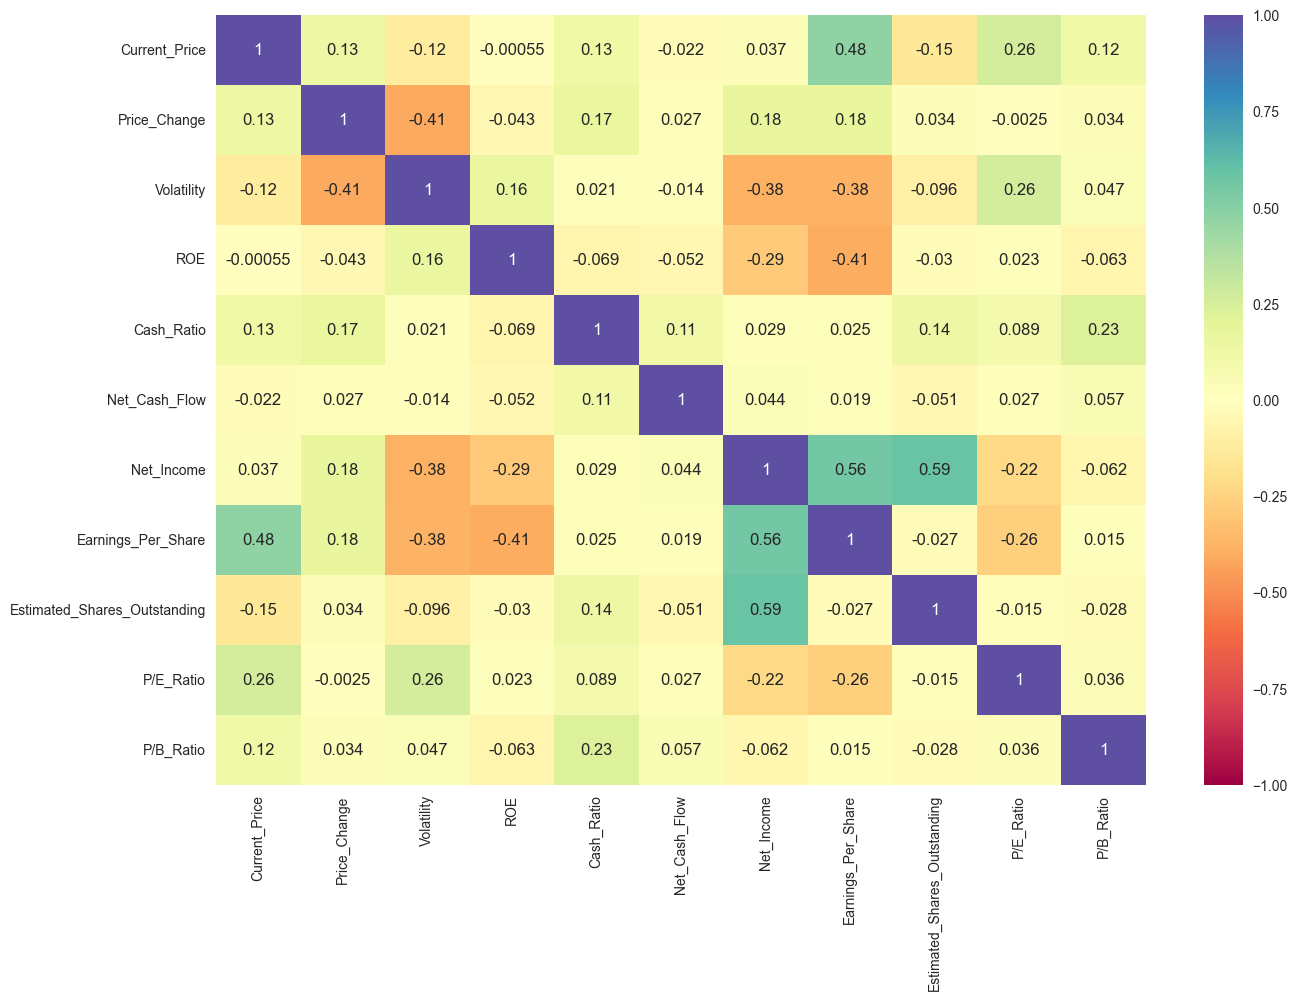

In [16]:
#Checking columns correlation
df_corre = df[num_col]
plt.figure(figsize=(15, 10))
sns.heatmap(df_corre.corr(), annot=True,  vmin=-1, vmax=1, cmap="Spectral")

<Axes: xlabel='Price_Change'>

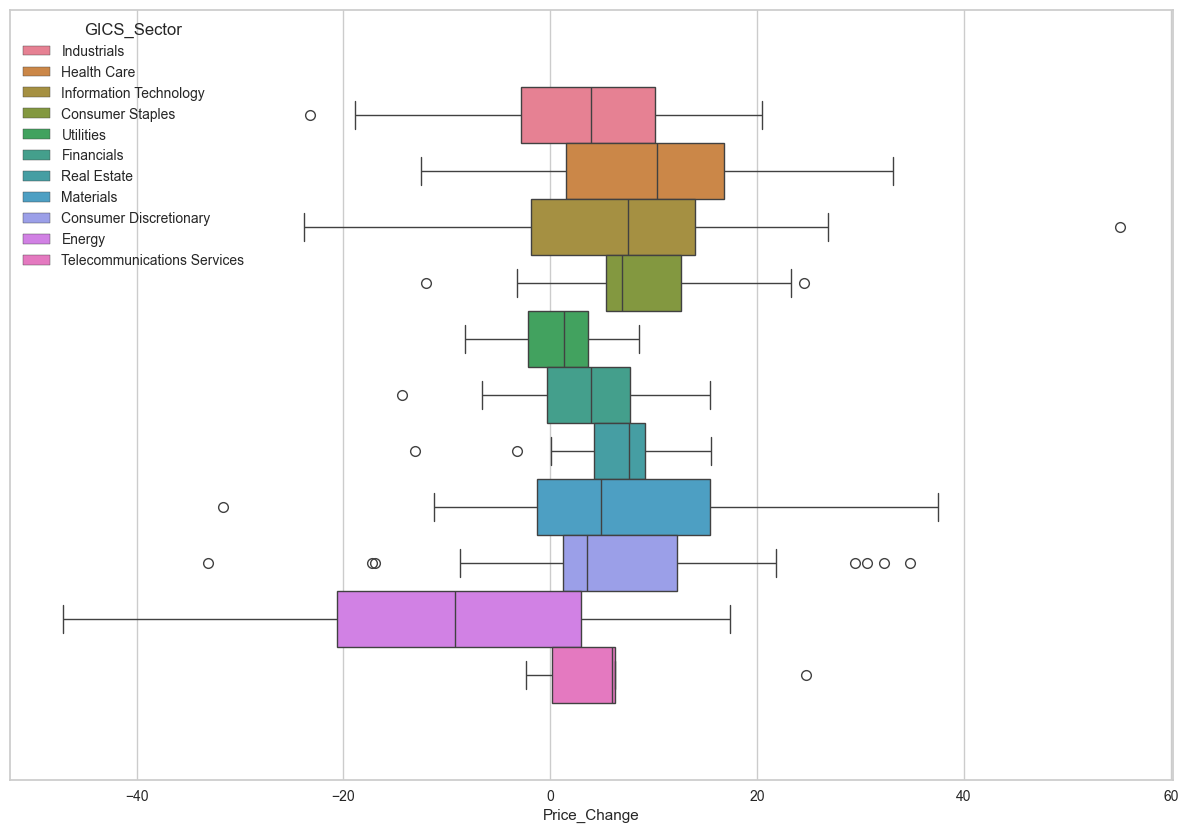

In [17]:
plt.figure(figsize=(15, 10))
sns.boxplot(df, x="Price_Change", hue="GICS_Sector")

<Axes: xlabel='Cash_Ratio'>

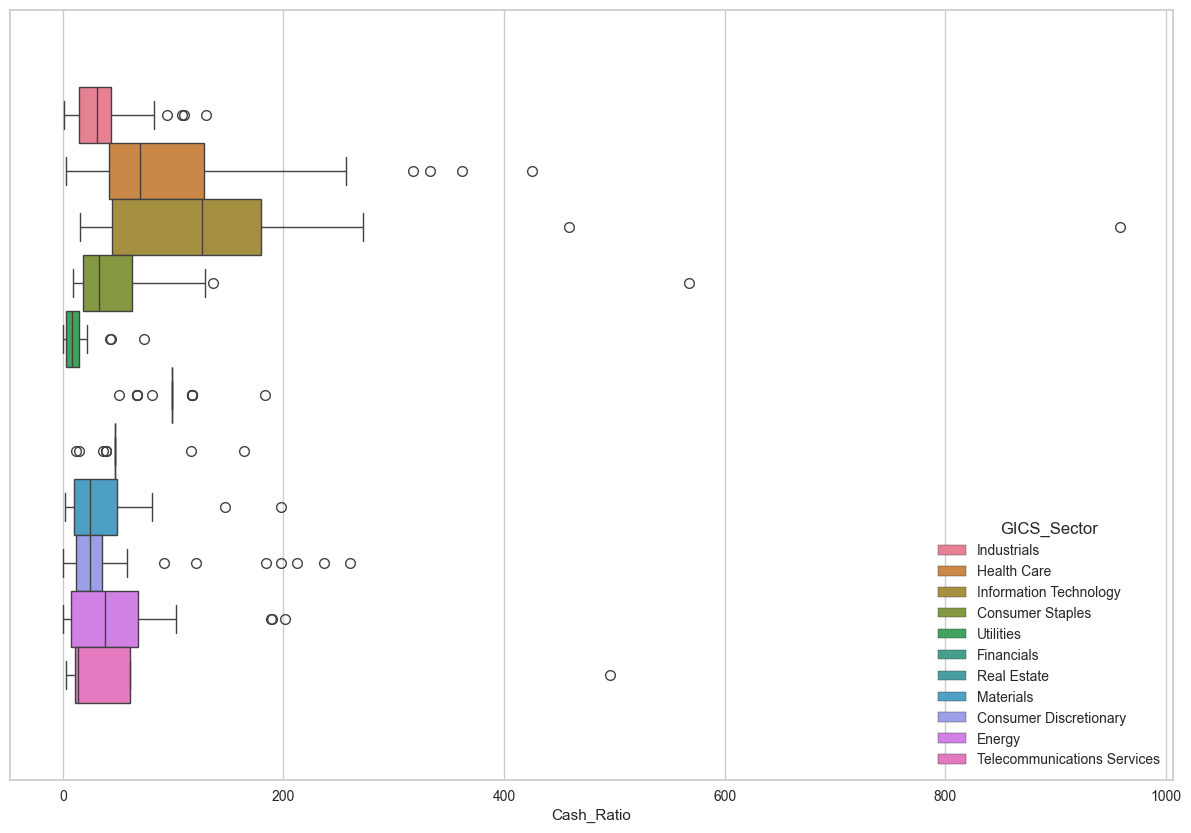

In [18]:
plt.figure(figsize=(15, 10))
sns.boxplot(df, x="Cash_Ratio", hue="GICS_Sector")

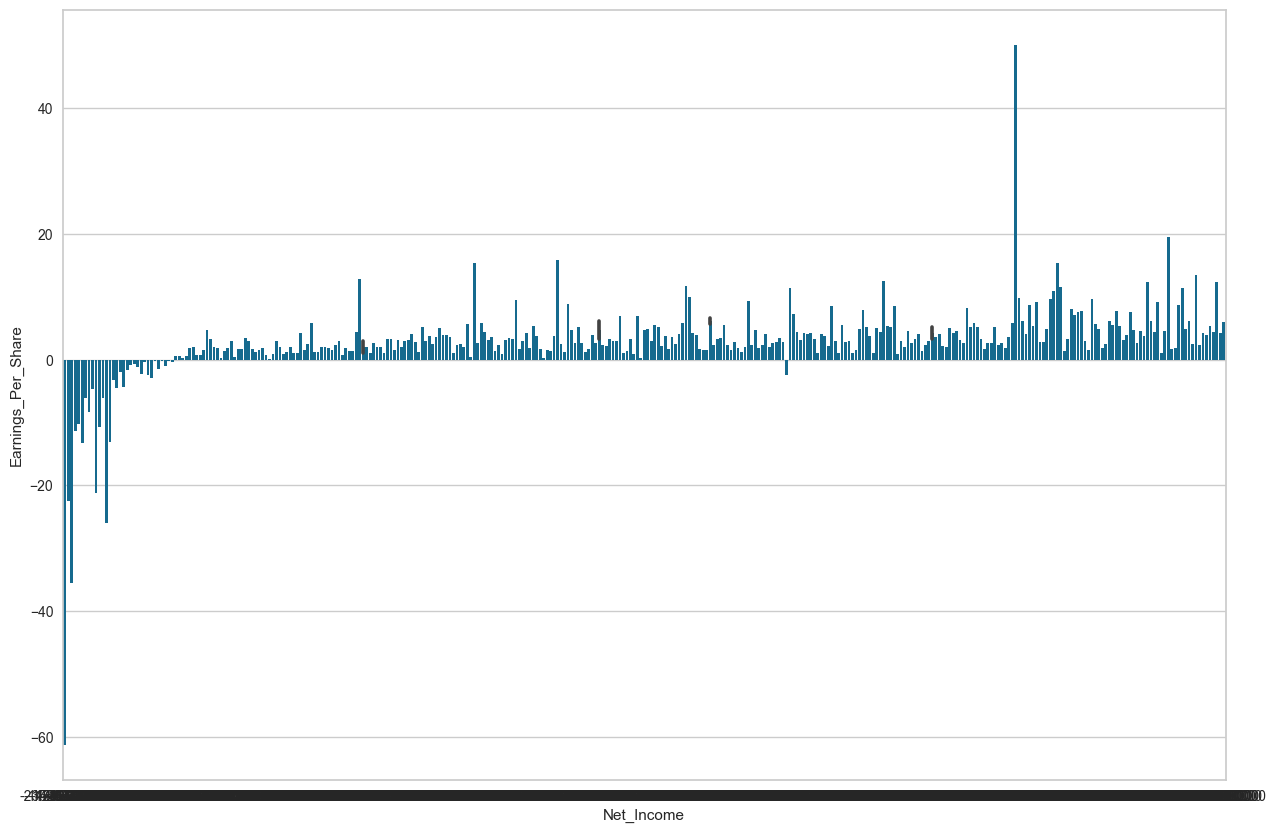

In [19]:
plt.figure(figsize=(15, 10))
sns.barplot(df, x="Net_Income", y="Earnings_Per_Share");

As seen before, there seems to be some kind of positive relation between the net income and the earnings per share. 

<Axes: xlabel='P/E_Ratio'>

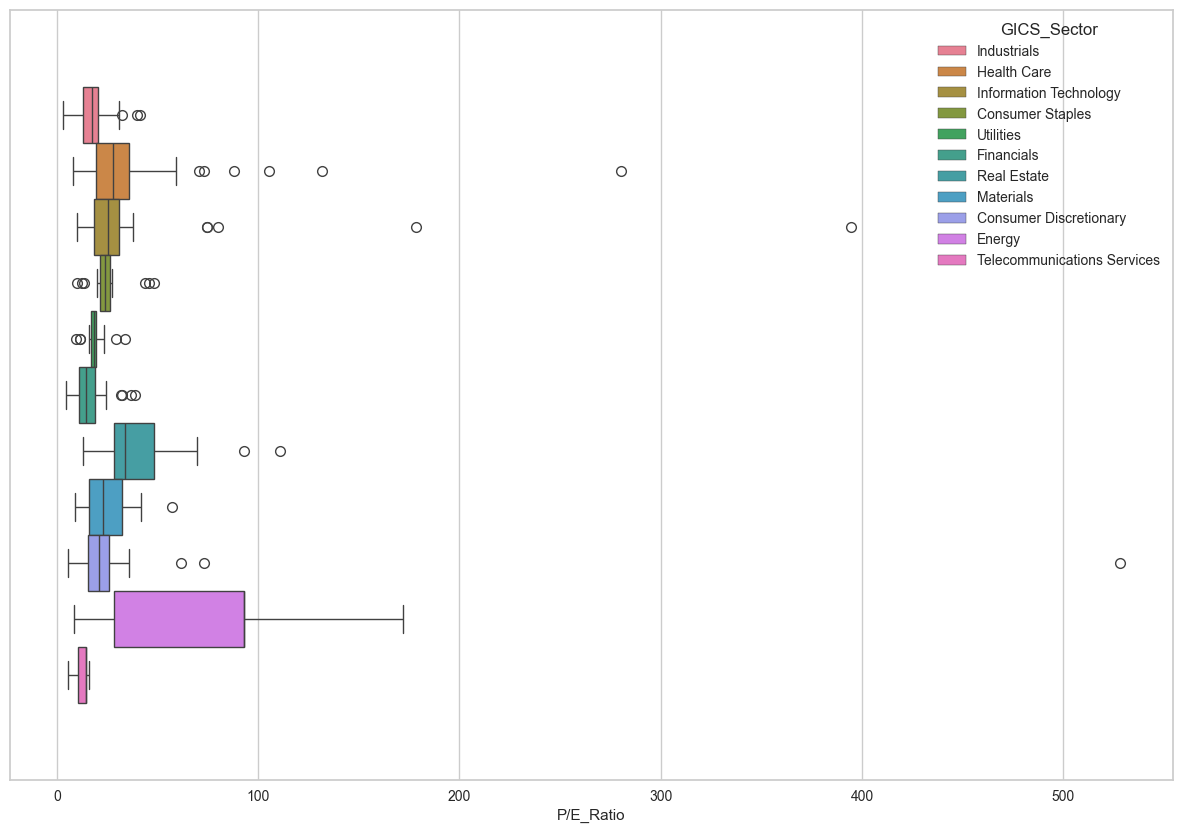

In [20]:
plt.figure(figsize=(15, 10))
sns.boxplot(df, x="P/E_Ratio", hue="GICS_Sector")

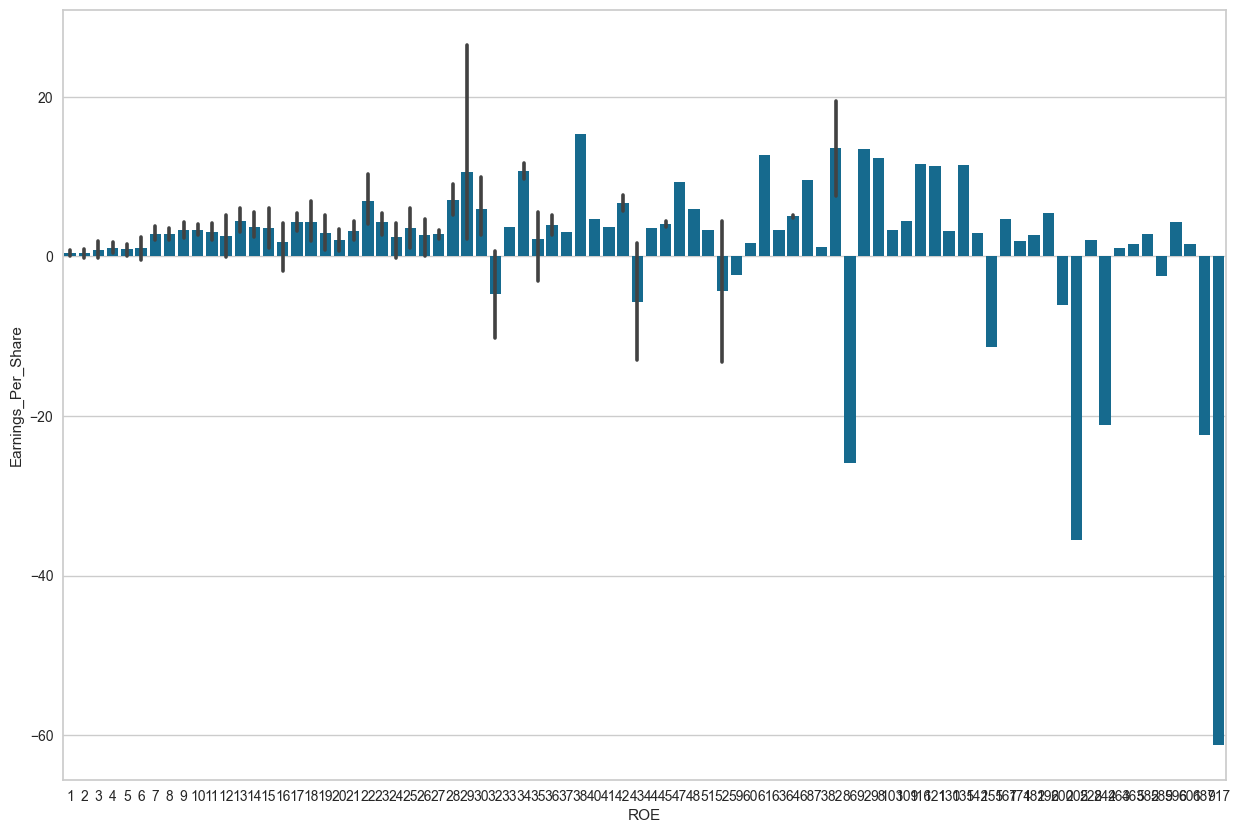

In [21]:
plt.figure(figsize=(15, 10))
sns.barplot(df, x="ROE", y="Earnings_Per_Share");

We can confirm here that there is a negative correlation between ROE and the Earnings per share.

**Questions**:

1. What does the distribution of stock prices look like?
 - Stocks seems to be following a normal distribution, but the data is highly skewed to the right. 
2. The stocks of which economic sector have seen the maximum price increase on average?
 - On average, health care sector has been experiencing the highest price increase.
3. How are the different variables correlated with each other?
 - Net income and price per share and estimated shares outstating seem to be the variables with the highest positive correlation. Roe and earning per share on the contrary, have the highers negative correlation.
4. Cash ratio provides a measure of a company's ability to cover its short-term obligations using only cash and cash equivalents. How does the average cash ratio vary across economic sectors?
 - Health care and Information Technology companies seem to have a higher cash ratio than other sectors, other sectors have less cash ratio in average. The outlier in the information technology sector is way above the rest of the companies. 
5. P/E ratios can help determine the relative value of a company's shares as they signify the amount of money an investor is willing to invest in a single share of a company per dollar of its earnings. How does the P/E ratio vary, on average, across economic sectors?
 - In general the highest P/E ratio is linked to the Energy sector, but an specific outlier in the Consumer discretionary sector is way above other sector including Information Technology. 

## Data Preprocessing

- Duplicate value check
- Missing value treatment
- Outlier check
- Feature engineering (if needed)
- Any other preprocessing steps (if needed)

In [22]:
df.isnull().sum()

Ticker_Symbol                   0
Security                        0
GICS_Sector                     0
GICS_Sub_Industry               0
Current_Price                   0
Price_Change                    0
Volatility                      0
ROE                             0
Cash_Ratio                      0
Net_Cash_Flow                   0
Net_Income                      0
Earnings_Per_Share              0
Estimated_Shares_Outstanding    0
P/E_Ratio                       0
P/B_Ratio                       0
dtype: int64

There is no missing data in our dataframe.

In [23]:
df.duplicated().sum()

np.int64(0)

There is no duplicated data in our data frame.

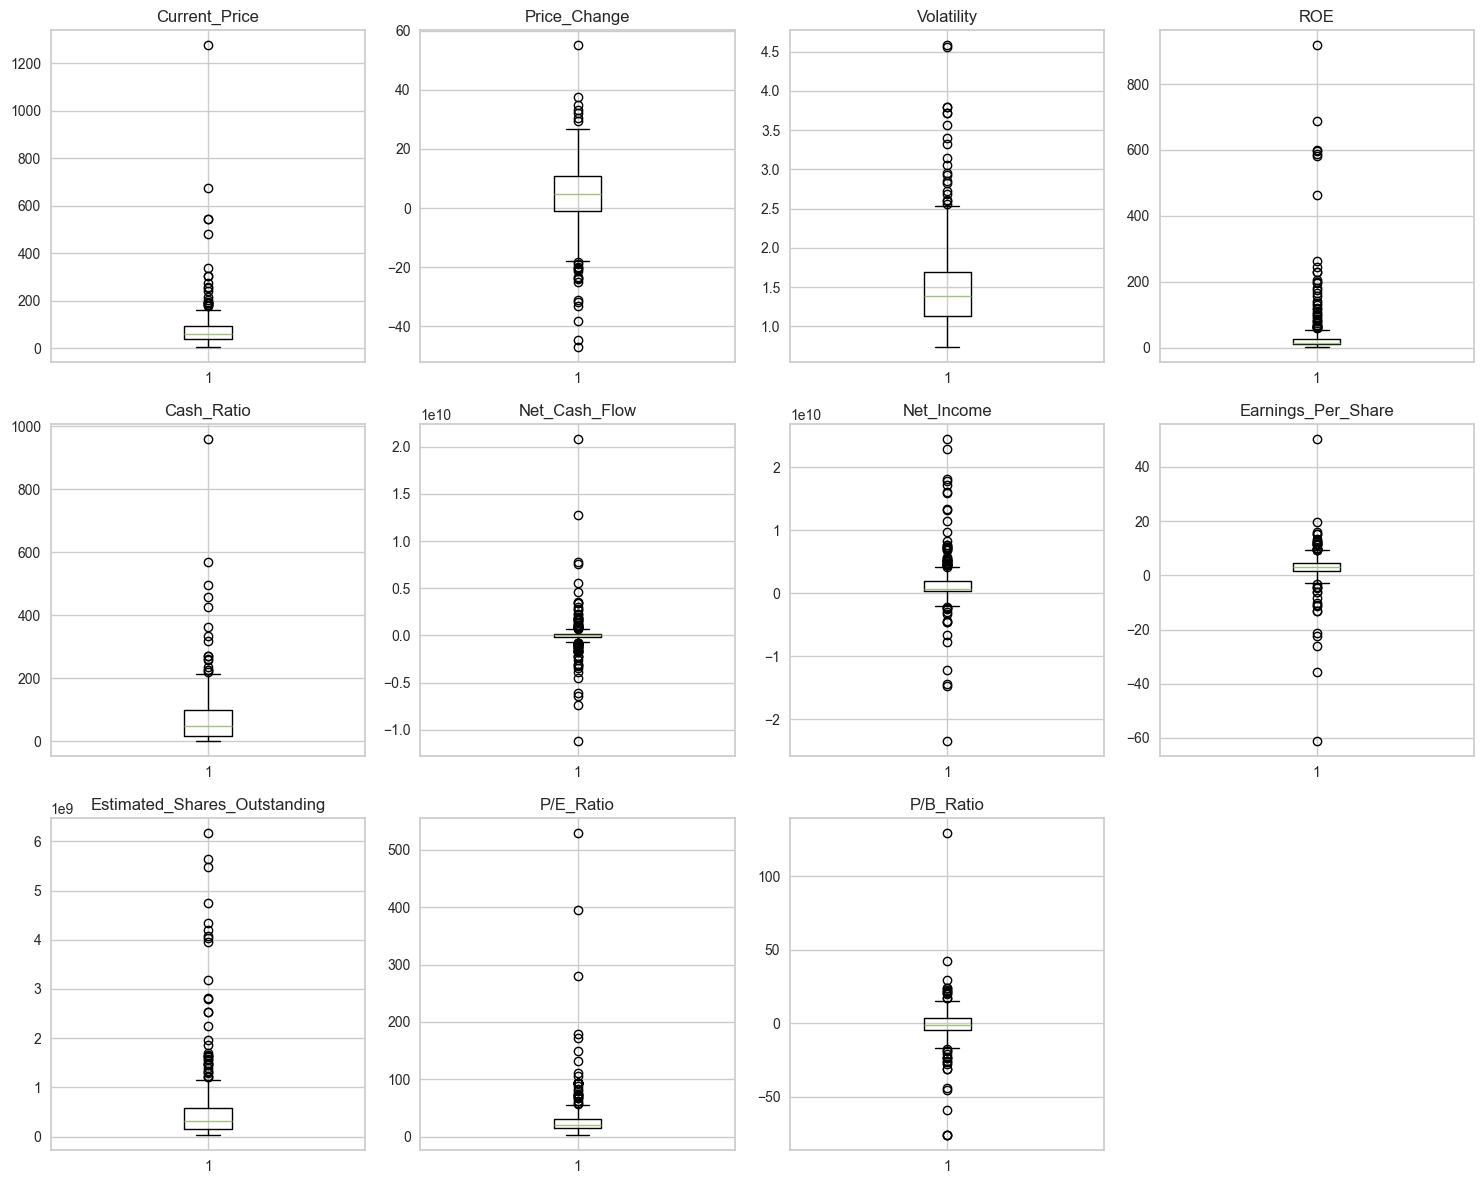

In [24]:
plt.figure(figsize=(15, 12))

num_col = df.select_dtypes(include=np.number).columns.tolist()

for i, variable in enumerate(num_col):
    plt.subplot(3, 4, i + 1)
    plt.boxplot(df[variable], whis=1.5)
    plt.tight_layout()
    plt.title(variable)

plt.show()

We can see that there are a lot of outliers in our data and the values have different magniture. For this some scaling will be needed.

In [25]:
#Creating an scaler object
scaler = StandardScaler()
subset = df[num_col].copy()
subset_scaled = scaler.fit_transform(subset)

In [26]:
# Creating a dataframe from the scaled data
subset_scaled_df = pd.DataFrame(subset_scaled, columns=subset.columns)

## EDA

- It is a good idea to explore the data once again after manipulating it.

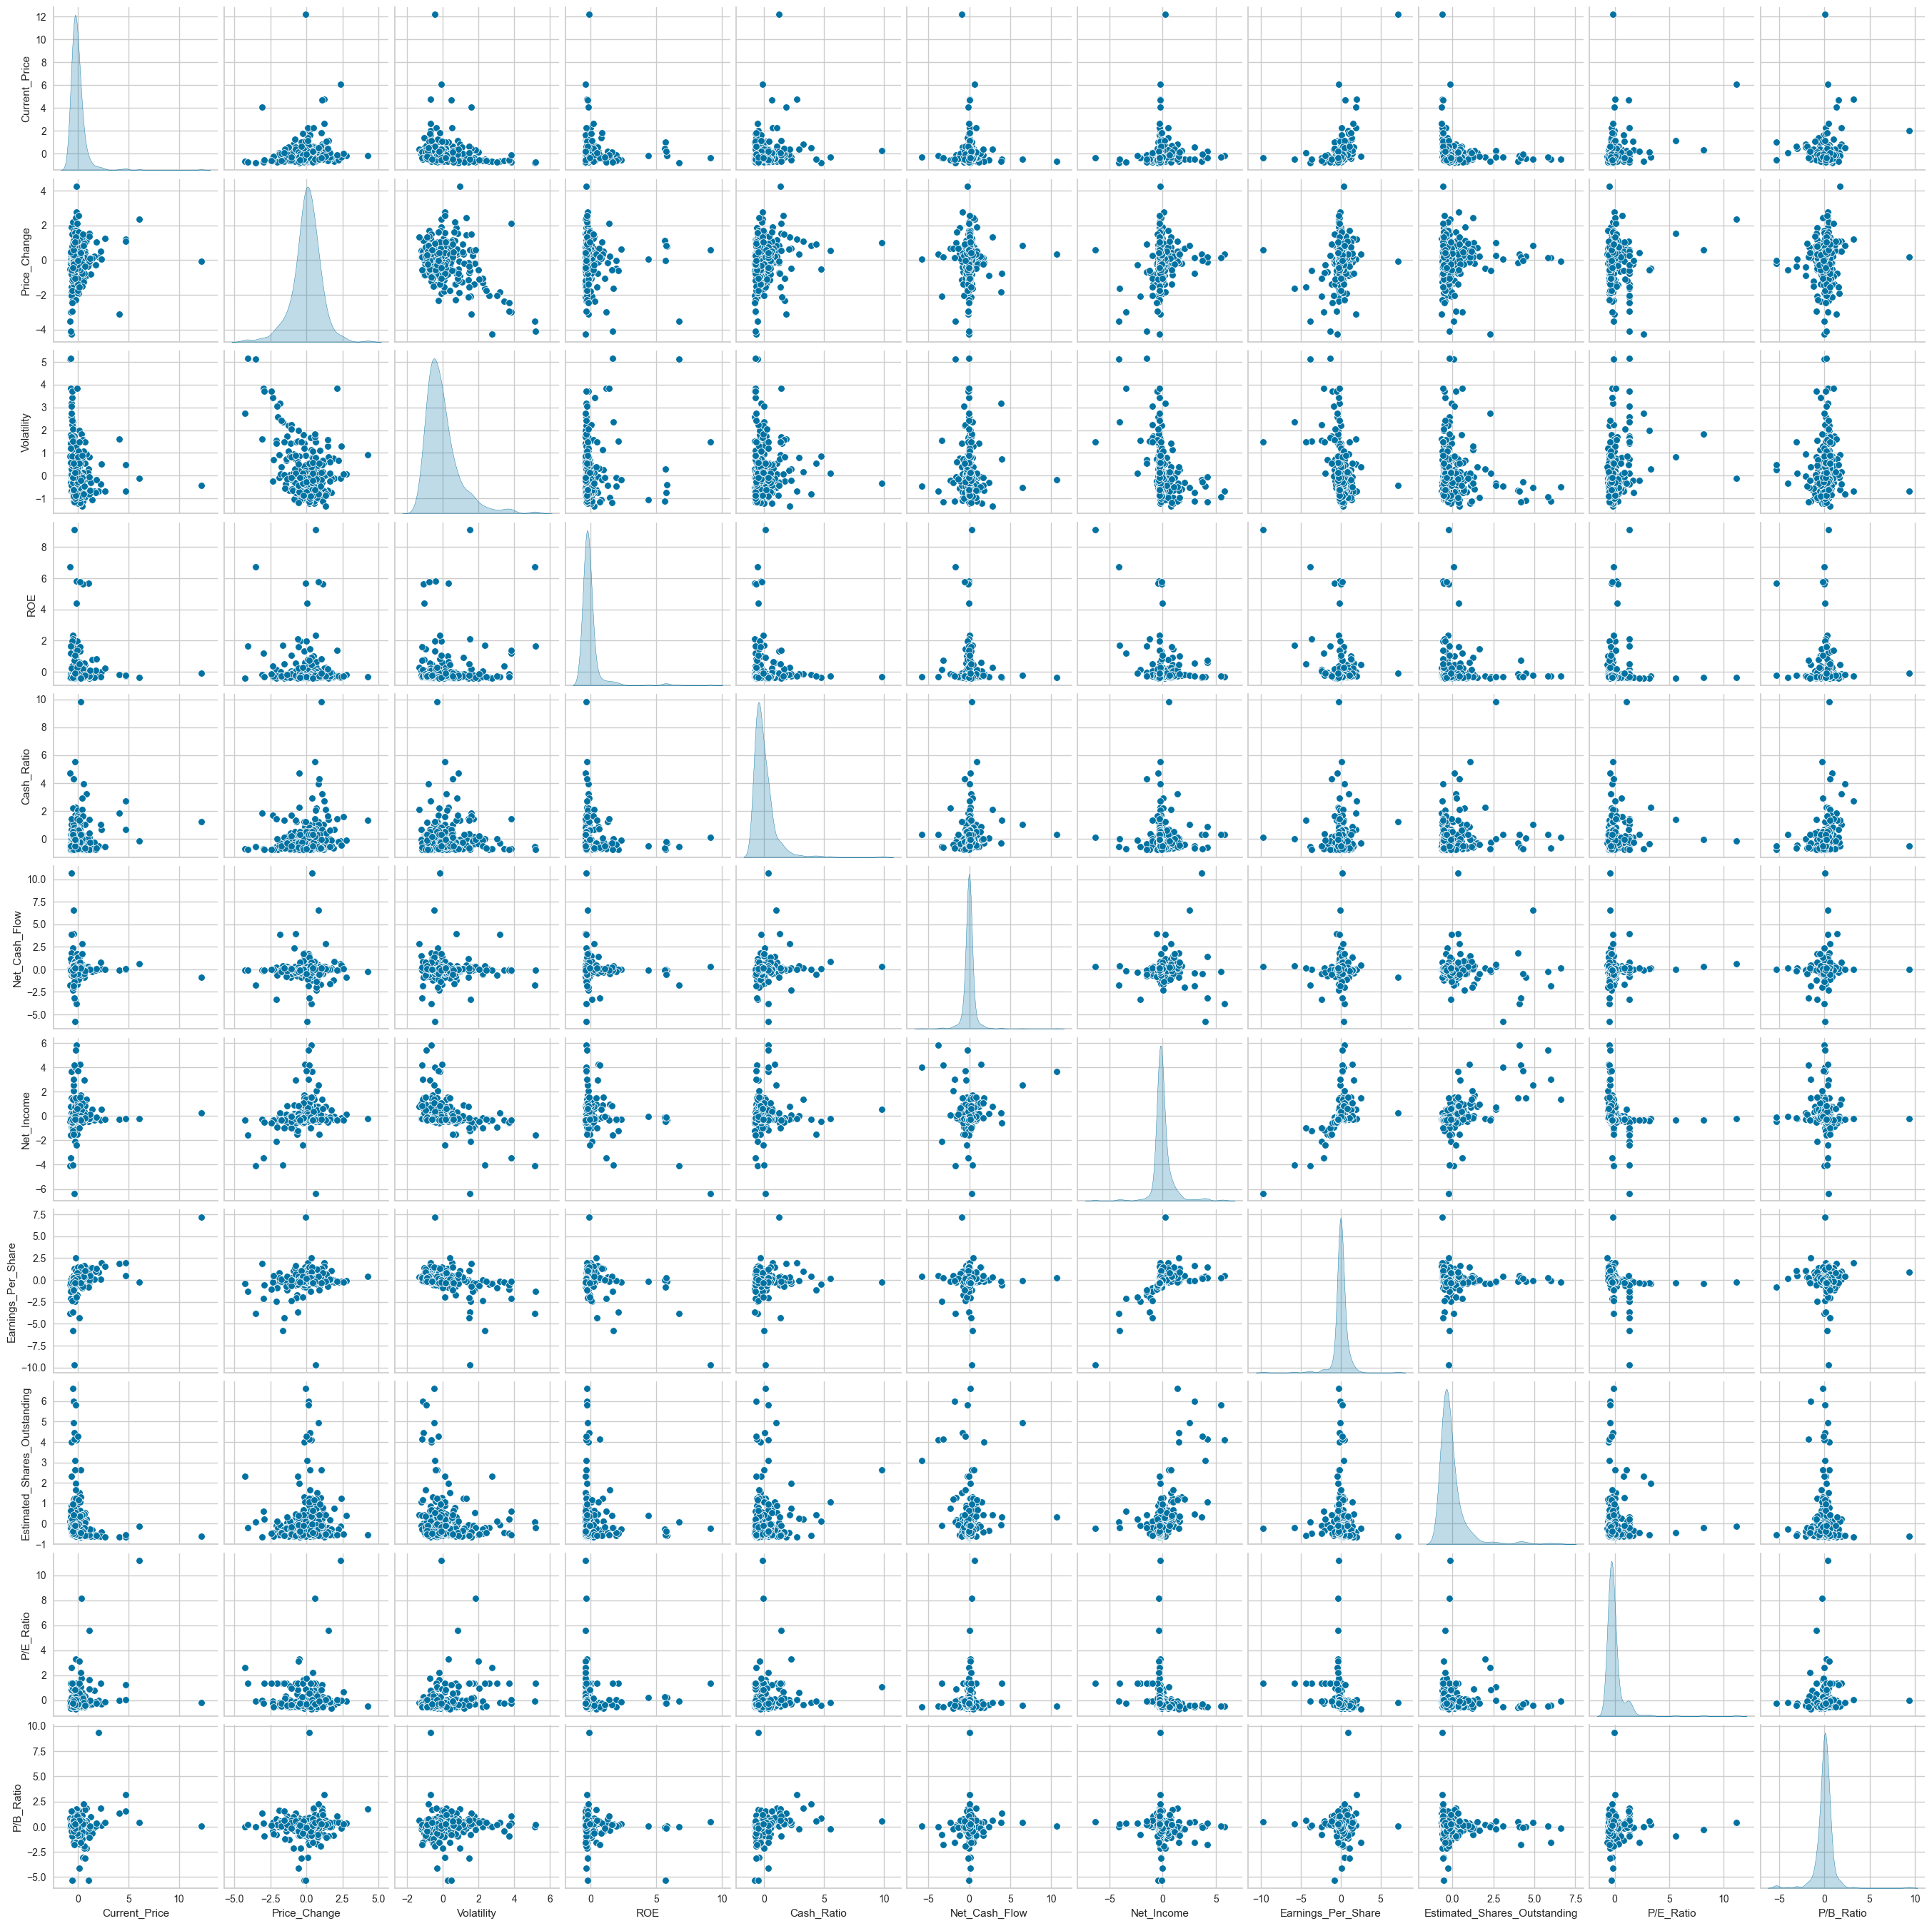

In [27]:
sns.pairplot(subset_scaled_df, diag_kind='kde');

After scaling our data keep the same structure and distribution.

## K-means Clustering

In [28]:
k_cluster = subset_scaled_df.copy()

In [29]:
clusters = range(1, 18)
meanDistortions = []

for k in clusters:
    model = KMeans(n_clusters=k, random_state=1)
    model.fit(k_cluster)
    prediction = model.predict(k_cluster)
    distortion = (
        sum(
            np.min(cdist(k_cluster, model.cluster_centers_, metric="cityblock"), axis=1)
        )
        / k_cluster.shape[0]
    )

    meanDistortions.append(distortion)

    print("Number of Clusters:", k, "\tAverage Distortion:", distortion)

plt.plot(clusters, meanDistortions, "bx-")
plt.xlabel("k")
plt.ylabel("Average distortion")
plt.title("Selecting k with the Elbow Method")
plt.show()

Number of Clusters: 1 	Average Distortion: 5.887920700424354
Number of Clusters: 2 	Average Distortion: 5.530359650899558
Number of Clusters: 3 	Average Distortion: 5.421219746563941
Number of Clusters: 4 	Average Distortion: 5.124211715016147
Number of Clusters: 5 	Average Distortion: 4.990367479220767
Number of Clusters: 6 	Average Distortion: 4.880708083671977
Number of Clusters: 7 	Average Distortion: 4.696599637690723
Number of Clusters: 8 	Average Distortion: 4.606144875644721
Number of Clusters: 9 	Average Distortion: 4.548583397786414
Number of Clusters: 10 	Average Distortion: 4.515276925746197
Number of Clusters: 11 	Average Distortion: 4.340101668961556
Number of Clusters: 12 	Average Distortion: 4.271438206234893
Number of Clusters: 13 	Average Distortion: 4.19481642619252
Number of Clusters: 14 	Average Distortion: 4.159622946480112
Number of Clusters: 15 	Average Distortion: 4.089032385936857
Number of Clusters: 16 	Average Distortion: 4.039459623145097
Number of Clusters

Per our elbow method, we can see that 2 or 3 clusters could be our best option while selecting the amount of clusters.

For n_clusters = 2, silhouette score is 0.45335782729503565
For n_clusters = 3, silhouette score is 0.40374060030338865
For n_clusters = 4, silhouette score is 0.4246430808437099
For n_clusters = 5, silhouette score is 0.4381539778147092
For n_clusters = 6, silhouette score is 0.40869599703024256
For n_clusters = 7, silhouette score is 0.1207450219233897
For n_clusters = 8, silhouette score is 0.3693991650696542
For n_clusters = 9, silhouette score is 0.35185096182499204
For n_clusters = 10, silhouette score is 0.32950073703610283
For n_clusters = 11, silhouette score is 0.1486586842527321
For n_clusters = 12, silhouette score is 0.15784241071085106
For n_clusters = 13, silhouette score is 0.15646997458716602
For n_clusters = 14, silhouette score is 0.16253506827999134
For n_clusters = 15, silhouette score is 0.1329239053852335
For n_clusters = 16, silhouette score is 0.13005017556716414
For n_clusters = 17, silhouette score is 0.13767844653424235


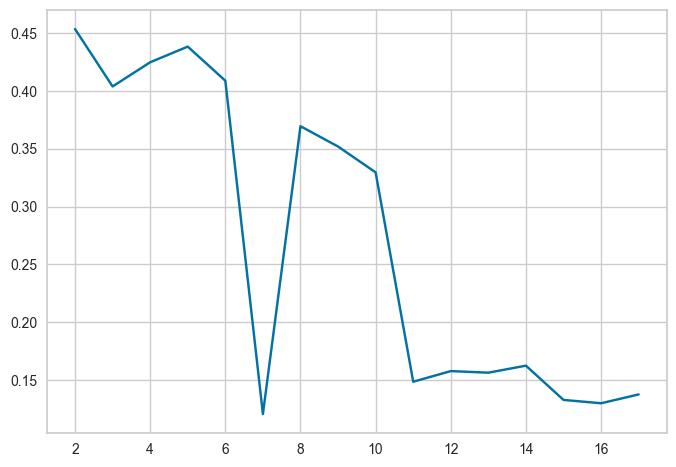

In [30]:
sil_score = []
cluster_list = list(range(2, 18))
for n_clusters in cluster_list:
    clusterer = KMeans(n_clusters=n_clusters, random_state=1)
    preds = clusterer.fit_predict((k_cluster))
    # centers = clusterer.cluster_centers_
    score = silhouette_score(k_cluster, preds)
    sil_score.append(score)
    print("For n_clusters = {}, silhouette score is {}".format(n_clusters, score))

plt.plot(cluster_list, sil_score)

After the initial decrease in the silhouette score, we see a higher score with 5 clusters. So we can try this value for our k-means model too.

In [31]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(3, random_state=1))
visualizer.fit(k_cluster)
visualizer.show();

In [32]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(4, random_state=1))
visualizer.fit(k_cluster)
visualizer.show();

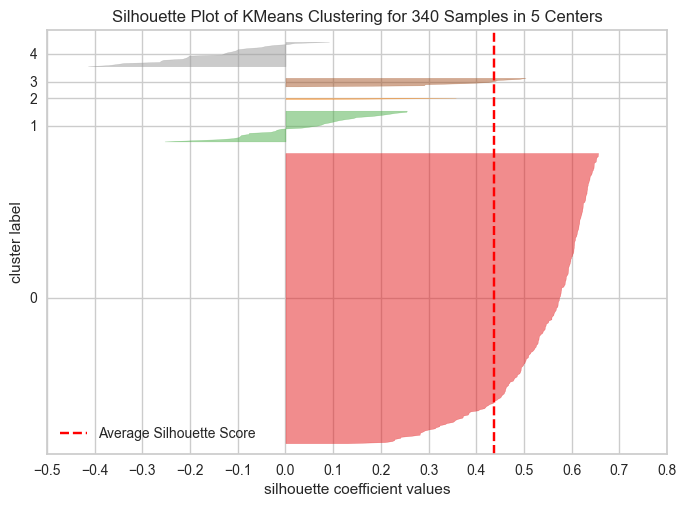

In [33]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(5, random_state=1))
visualizer.fit(k_cluster)
visualizer.show();

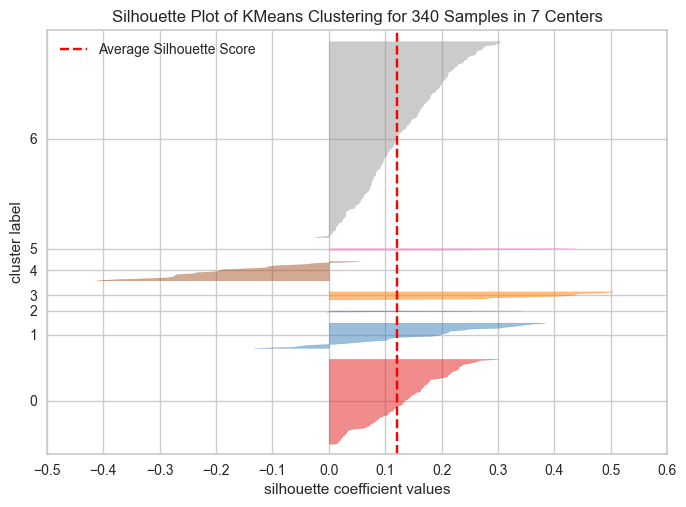

In [34]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(7, random_state=1))
visualizer.fit(k_cluster)
visualizer.show();

In [35]:
# finding optimal no. of clusters with silhouette coefficients
visualizer = SilhouetteVisualizer(KMeans(8, random_state=1))
visualizer.fit(k_cluster)
visualizer.show();

In [36]:
%%time
# Use 5 as the number of clusters
kmeans = KMeans(n_clusters=4, random_state=1)
kmeans.fit(k_cluster)

CPU times: user 9.61 ms, sys: 9.6 ms, total: 19.2 ms
Wall time: 4.31 ms


KMeans(n_clusters=4, random_state=1)

In [37]:
#Creatng a new dataset from the original to store k-means labels without modifying df. 
df_2 = df.copy()
# Adding the cluster labels to the dataframe
df_2['K_Means_Labels'] = kmeans.labels_
k_cluster['K_Means_Labels'] = kmeans.labels_

In [38]:
k_cluster.head(5)

Current_Price  Price_Change  Volatility       ROE  Cash_Ratio  \
0      -0.393341      0.493950    0.272749  0.989601   -0.210698   
1      -0.220837      0.355439    1.137045  0.937737    0.077269   
2      -0.367195      0.602479   -0.427007 -0.192905   -0.033488   
3       0.133567      0.825696   -0.284802 -0.317379    1.218059   
4      -0.260874     -0.492636    0.296470 -0.265515    2.237018   

   Net_Cash_Flow  Net_Income  Earnings_Per_Share  \
0      -0.339355    1.554415            1.309399   
1      -0.002335    0.927628            0.056755   
2       0.454058    0.744371            0.024831   
3      -0.152497   -0.219816           -0.230563   
4       0.133564   -0.202703           -0.374982   

   Estimated_Shares_Outstanding  P/E_Ratio  P/B_Ratio  K_Means_Labels  
0                      0.107863  -0.652487  -0.506653               0  
1                      1.250274  -0.311769  -0.504205               0  
2                      1.098021  -0.391502   0.094941               0  
3                     -0.091622   0.947148   0.424333               0  
4                      1.978399   3.293307   0.199196               1

### Cluster profiling

In [39]:
# Checking how many observations are assigned to each cluster
print(k_cluster['K_Means_Labels'].value_counts())


K_Means_Labels
0    295
1     32
3     11
2      2
Name: count, dtype: int64


In [40]:
# Grouping and checking mean values per cluster
cluster_profile_1 = df_2.groupby('K_Means_Labels').mean(numeric_only=True)

# Display cluster profiles
cluster_profile_1.style.highlight_max(color="gray", axis=0)

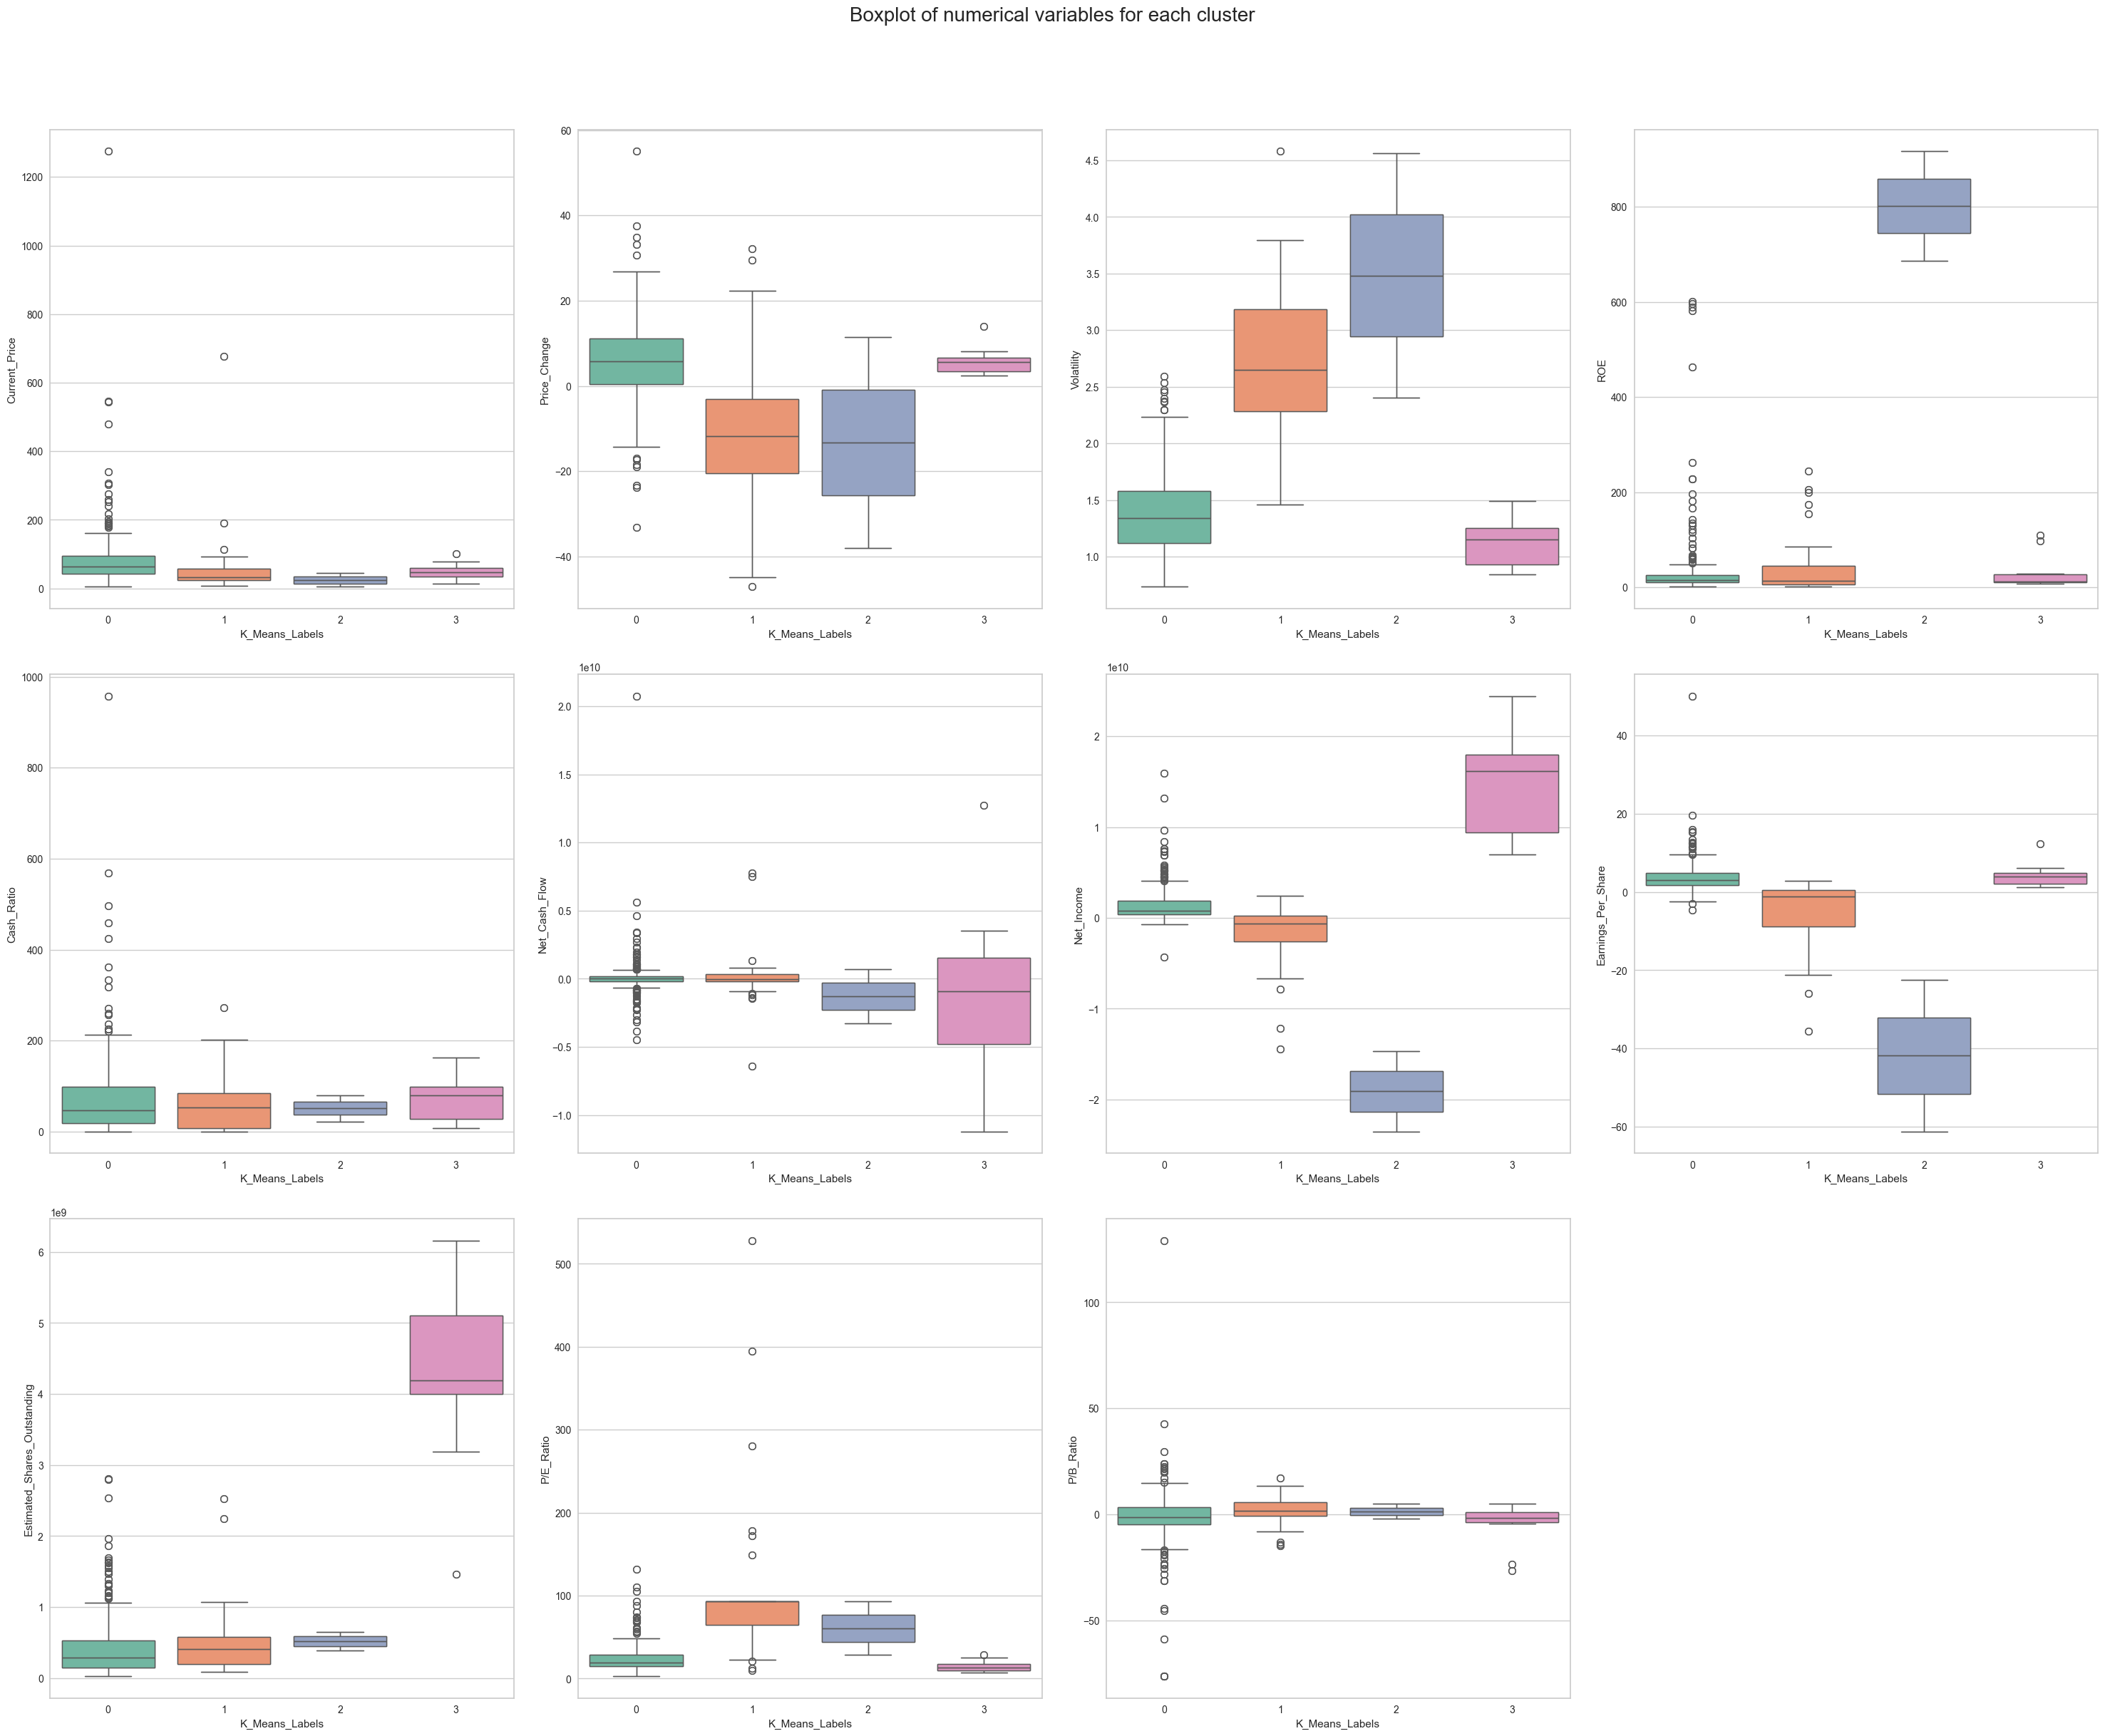

In [41]:
# Dynamically calculate the number of rows and columns for subplots
n_cols = 4  # Number of plots per row
n_rows = (len(num_col) + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 25))
axes = axes.flatten()  # Flatten the axes array for easy iteration

fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)

for ii, col in enumerate(num_col):
    sns.boxplot(
        ax=axes[ii],
        y=df_2[col],
        x=df_2["K_Means_Labels"],
        palette='Spectral'
    )

# Hide any unused subplots
for jj in range(len(num_col), len(axes)):
    fig.delaxes(axes[jj])

# Adjust layout to display 4 plots per row
fig.tight_layout(pad=2.0, rect=[0, 0, 1, 0.95])
axes = axes.flatten()
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)

for ii, col in enumerate(num_col):
    sns.boxplot(
        ax=axes[ii],
        y=df_2[col],
        x=df_2["K_Means_Labels"],
        palette="Set2"
    )

# Adjust layout to display 4 or 5 plots per row
fig.tight_layout(pad=2.0, rect=[0, 0, 1, 0.95])

In [42]:
# List of companies (Security) on each cluster
lists = df_2.groupby('K_Means_Labels')['Security'].apply(list)
# Printing the names of the securities in each cluster
for i in range(len(lists)):
    print(f'On Cluster {i}: there are {len(lists[i])} securities')
    print(f'Cluster {i}: {lists[i]}')

On Cluster 0: there are 295 securities
Cluster 0: ['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Archer-Daniels-Midland Co', 'Alliance Data Systems', 'Ameren Corp', 'American Electric Power', 'AFLAC Inc', 'American International Group, Inc.', 'Apartment Investment & Mgmt', 'Assurant Inc', 'Arthur J. Gallagher & Co.', 'Akamai Technologies Inc', 'Albemarle Corp', 'Alaska Air Group Inc', 'Allstate Corp', 'Allegion', 'Applied Materials Inc', 'AMETEK Inc', 'Affiliated Managers Group Inc', 'Amgen Inc', 'Ameriprise Financial', 'American Tower Corp A', 'AutoNation Inc', 'Anthem Inc.', 'Aon plc', 'Amphenol Corp', 'Arconic Inc', 'Activision Blizzard', 'AvalonBay Communities, Inc.', 'Broadcom', 'American Water Works Company Inc', 'American Express Co', 'Boeing Company', 'Bank of America Corp', 'Baxter International Inc.', 'BB&T Corporation', 'Bard (C.R.) Inc.', 'BIOGEN IDEC Inc.', 'The Bank of New York Mellon Corp.', 'Ball Corp', 'Bristol-Myers Squibb', 'Boston

## Hierarchical Clustering

In [43]:
#Copying scaled dataframe to be used in our hierarchical clustering
hierarchical = subset_scaled_df.copy()

In [44]:
# list of distance metrics
distance_metrics = ["euclidean", "chebyshev", "mahalanobis", "cityblock"]

# list of linkage methods
linkage_methods = ["single", "complete", "average", "weighted"]

high_cophenet_corr = 0
high_dm_lm = [0, 0]


#Loop to calculate and print the cophenetic correlation for each combination of distance metric and linkage method
for dm in distance_metrics:
    for lm in linkage_methods:
        Z = linkage(hierarchical, metric=dm, method=lm)
        c, coph_dists = cophenet(Z, pdist(hierarchical))
        print(
            "Cophenetic correlation for {} distance and {} linkage is {}.".format(
                dm.capitalize(), lm, c
            )
        )
        if high_cophenet_corr < c:
            high_cophenet_corr = c
            high_dm_lm[0] = dm
            high_dm_lm[1] = lm

print("\n", "-" * 100, "\n",sep="")
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} distance and {} linkage.".format(
        high_cophenet_corr, high_dm_lm[0].capitalize(), high_dm_lm[1]
    )
)

Cophenetic correlation for Euclidean distance and single linkage is 0.9232271494002922.
Cophenetic correlation for Euclidean distance and complete linkage is 0.7873280186580672.
Cophenetic correlation for Euclidean distance and average linkage is 0.9422540609560813.
Cophenetic correlation for Euclidean distance and weighted linkage is 0.8693784298129404.
Cophenetic correlation for Chebyshev distance and single linkage is 0.9062538164750717.
Cophenetic correlation for Chebyshev distance and complete linkage is 0.598891419111242.
Cophenetic correlation for Chebyshev distance and average linkage is 0.93382655280305.
Cophenetic correlation for Chebyshev distance and weighted linkage is 0.9127355892367.
Cophenetic correlation for Mahalanobis distance and single linkage is 0.9259195530524591.
Cophenetic correlation for Mahalanobis distance and complete linkage is 0.7925307202850002.
Cophenetic correlation for Mahalanobis distance and average linkage is 0.9247324030159736.
Cophenetic correlat

In [45]:
#Checking the cophenetic correlation for each linkage method with euclidean distance
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]


high_cophenet_corr = 0
high_dm_lm = [0, 0]
#Loop to calculate and print the cophenetic correlation for each linkage method
for lm in linkage_methods:
    Z = linkage(subset_scaled_df, metric="euclidean", method=lm)
    c, coph_dists = cophenet(Z, pdist(hierarchical))
    print("Cophenetic correlation for {} linkage is {}.".format(lm, c))
    if high_cophenet_corr < c:
        high_cophenet_corr = c
        high_dm_lm[0] = "euclidean"
        high_dm_lm[1] = lm

print("\n", "-" * 100, "\n",sep="")
# printing the combination of distance metric and linkage method with the highest cophenetic correlation
print(
    "Highest cophenetic correlation is {}, which is obtained with {} linkage.".format(
        high_cophenet_corr, high_dm_lm[1]
    )
)

Cophenetic correlation for single linkage is 0.9232271494002922.
Cophenetic correlation for complete linkage is 0.7873280186580672.
Cophenetic correlation for average linkage is 0.9422540609560813.
Cophenetic correlation for centroid linkage is 0.9314012446828155.
Cophenetic correlation for ward linkage is 0.7101180299865353.
Cophenetic correlation for weighted linkage is 0.8693784298129404.

----------------------------------------------------------------------------------------------------

Highest cophenetic correlation is 0.9422540609560813, which is obtained with average linkage.


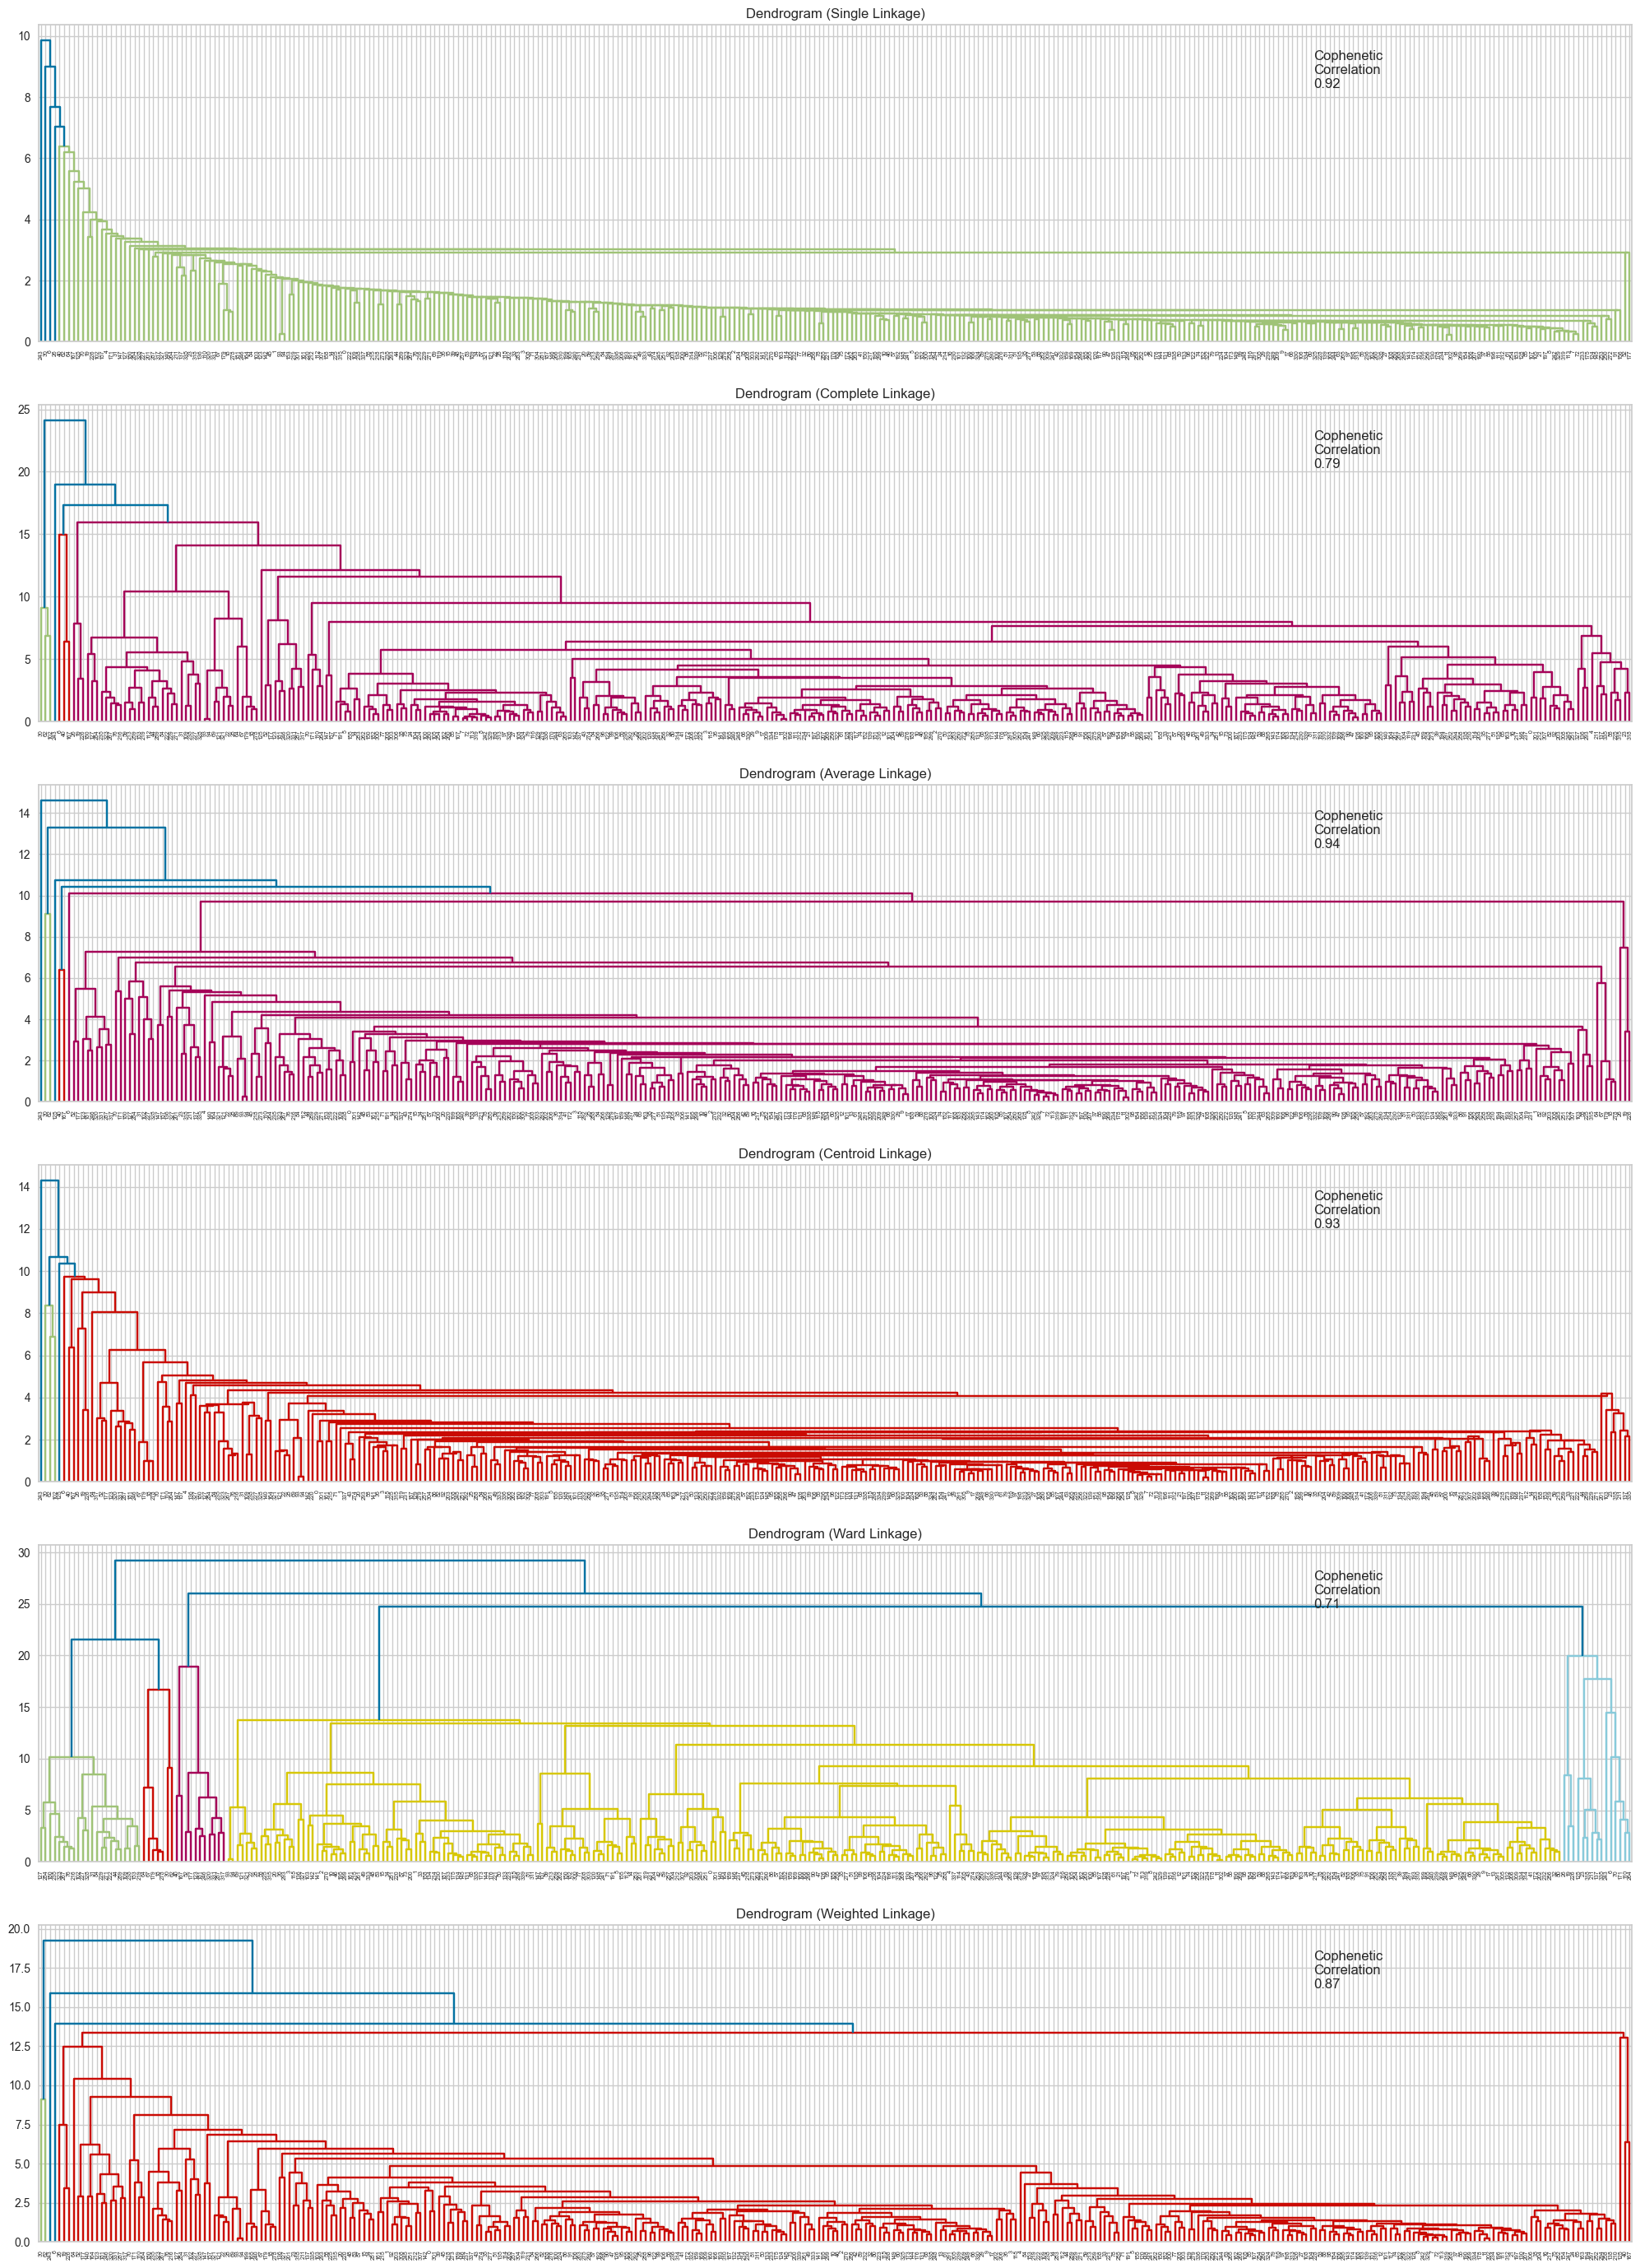

In [46]:
# list of linkage methods
linkage_methods = ["single", "complete", "average", "centroid", "ward", "weighted"]

# lists to save results of cophenetic correlation calculation
compare_cols = ["Linkage", "Cophenetic Coefficient"]

# to create a subplot image
fig, axs = plt.subplots(len(linkage_methods), 1, figsize=(25, 35))

# We will enumerate through the list of linkage methods above
# For each linkage method, we will plot the dendrogram and calculate the cophenetic correlation
for i, method in enumerate(linkage_methods):
    Z = linkage(hierarchical, metric="euclidean", method=method)

    dendrogram(Z, ax=axs[i])
    axs[i].set_title(f"Dendrogram ({method.capitalize()} Linkage)")

    coph_corr, coph_dist = cophenet(Z, pdist(hierarchical))
    axs[i].annotate(
        f"Cophenetic\nCorrelation\n{coph_corr:0.2f}",
        (0.80, 0.80),
        xycoords="axes fraction",
    )

The best cophenetic correlation is obtained when using the Average Linkage with Euclidean distance which suggests that the optimal number of clusters is 4, but as we can see in the ward plot, even if this linkage does not have the highest cophenetic correlation, the 5 clusters obtained are more organized and probably more organized than our average linkage. So both options are going to be tested.

### Model 1

In [47]:
%%time
HCmodel1 = AgglomerativeClustering(n_clusters=4, metric="euclidean", linkage="average")
# Fitting the model
HCmodel1.fit(subset_scaled_df)

CPU times: user 1.78 ms, sys: 625 μs, total: 2.4 ms
Wall time: 2.84 ms


AgglomerativeClustering(linkage='average', n_clusters=4)

In [48]:
# Checking how many observations are assigned to each cluster on the first model
df_hc1 = df.copy()
df_hc1["HCmodel1_Labels"] = HCmodel1.labels_
df_hc1.groupby("HCmodel1_Labels")["HCmodel1_Labels"].count()

# Print the companies(securities) in each cluster
for cl in df_hc1["HCmodel1_Labels"].unique():
    print("In cluster {}, this companies/scurities are included:".format(cl))
    print(df_hc1[df_hc1["HCmodel1_Labels"] == cl]["Security"].unique())
    print("\n", "-" * 100, "\n", sep="")
    print()

In cluster 0, this companies/scurities are included:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Alliance Data Systems' 'Ameren Corp' 'American Electric Power'
 'AFLAC Inc' 'American International Group, Inc.'
 'Apartment Investment & Mgmt' 'Assurant Inc' 'Arthur J. Gallagher & Co.'
 'Akamai Technologies Inc' 'Albemarle Corp' 'Alaska Air Group Inc'
 'Allstate Corp' 'Allegion' 'Alexion Pharmaceuticals'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Amgen Inc' 'Ameriprise Financial' 'American Tower Corp A'
 'Amazon.com Inc' 'AutoNation Inc' 'Anthem Inc.' 'Aon plc'
 'Anadarko Petroleum Corp' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Bank of America Corp' 'Baxter International Inc.' 'BB&T Corporation'
 'Bard (C.R.) Inc.' 'Baker Hughes Inc' 'BIOGEN IDEC

In [49]:
# Checking how many observations are assigned to each cluster on the second model
subset_scaled_df_hc1 = subset_scaled_df.copy()
subset_scaled_df_hc1["HCmodel1_Labels"] = HCmodel1.labels_
subset_scaled_df_hc1.groupby("HCmodel1_Labels")["HCmodel1_Labels"].count()

HCmodel1_Labels
0    336
1      1
2      2
3      1
Name: HCmodel1_Labels, dtype: int64

### Model 2

In [50]:
%%time
HCmodel2 = AgglomerativeClustering(n_clusters=5, metric="euclidean", linkage="ward")
# Fitting the model
HCmodel2.fit(subset_scaled_df)

CPU times: user 3.4 ms, sys: 852 μs, total: 4.25 ms
Wall time: 4.08 ms


AgglomerativeClustering(n_clusters=5)

In [51]:
#Checking how many observations are assigned to each cluster on the second model
df_hc2 = df.copy()
df_hc2["HCmodel2_Labels"] = HCmodel2.labels_
df_hc2.groupby("HCmodel2_Labels")["HCmodel2_Labels"].count()
# Print the companies(securities) in each cluster
for cl in df_hc2["HCmodel2_Labels"].unique():
    print("In cluster {}, this companies/scurities are included:".format(cl))
    print(df_hc2[df_hc2["HCmodel2_Labels"] == cl]["Security"].unique())
    print("\n", "-" * 100, "\n", sep="")
    print()

In cluster 3, this companies/scurities are included:
['American Airlines Group' 'AbbVie' 'Abbott Laboratories'
 'Adobe Systems Inc' 'Analog Devices, Inc.' 'Archer-Daniels-Midland Co'
 'Ameren Corp' 'American Electric Power' 'AFLAC Inc'
 'American International Group, Inc.' 'Apartment Investment & Mgmt'
 'Assurant Inc' 'Arthur J. Gallagher & Co.' 'Akamai Technologies Inc'
 'Albemarle Corp' 'Alaska Air Group Inc' 'Allstate Corp'
 'Applied Materials Inc' 'AMETEK Inc' 'Affiliated Managers Group Inc'
 'Ameriprise Financial' 'American Tower Corp A' 'AutoNation Inc'
 'Anthem Inc.' 'Aon plc' 'Amphenol Corp' 'Arconic Inc'
 'Activision Blizzard' 'AvalonBay Communities, Inc.' 'Broadcom'
 'American Water Works Company Inc' 'American Express Co' 'Boeing Company'
 'Baxter International Inc.' 'BB&T Corporation' 'Bard (C.R.) Inc.'
 'BIOGEN IDEC Inc.' 'The Bank of New York Mellon Corp.' 'Ball Corp'
 'Bristol-Myers Squibb' 'Boston Scientific' 'BorgWarner'
 'Boston Properties' 'Caterpillar Inc.' 'Chubb L

In [52]:
# Checking how many observations are assigned to each cluster on the second model
subset_scaled_df_hc2 = subset_scaled_df.copy()
subset_scaled_df_hc2["HCmodel2_Labels"] = HCmodel2.labels_
subset_scaled_df_hc2.groupby("HCmodel2_Labels")["HCmodel2_Labels"].count()

HCmodel2_Labels
0     15
1      7
2     11
3    285
4     22
Name: HCmodel2_Labels, dtype: int64

We get some more distinct clusters using the Euclidean distance with a Ward linkage with a total of 5. So this is the model we are going to use for out final hierachical clustering model. 

### Final model

In [53]:
# Creating the final model with the best parameters
HC_final = AgglomerativeClustering(
    n_clusters=5, metric="euclidean", linkage="ward"
)
# Fitting the model
HC_final.fit(subset_scaled_df)

AgglomerativeClustering(n_clusters=5)

In [54]:
#Creatng a new dataset from the original to store hierarchical clustering labels without modifying df. 
df_3 = df.copy()

In [55]:
# adding hierarchical cluster labels to the original and scaled dataframes
subset_scaled_df["HC_Clusters"] = HC_final.labels_
df_3["HC_Clusters"] = HC_final.labels_

In [56]:
# Exclude non-numeric columns before applying mean
cluster_profile_2 = df_3.groupby("HC_Clusters")[num_col].mean()
# Checking how many observations are assigned to each cluster
print(df_3['HC_Clusters'].value_counts())

HC_Clusters
3    285
4     22
0     15
2     11
1      7
Name: count, dtype: int64


In [57]:
# let's display cluster profiles
cluster_profile_2.style.highlight_max(color="lightgreen", axis=0)

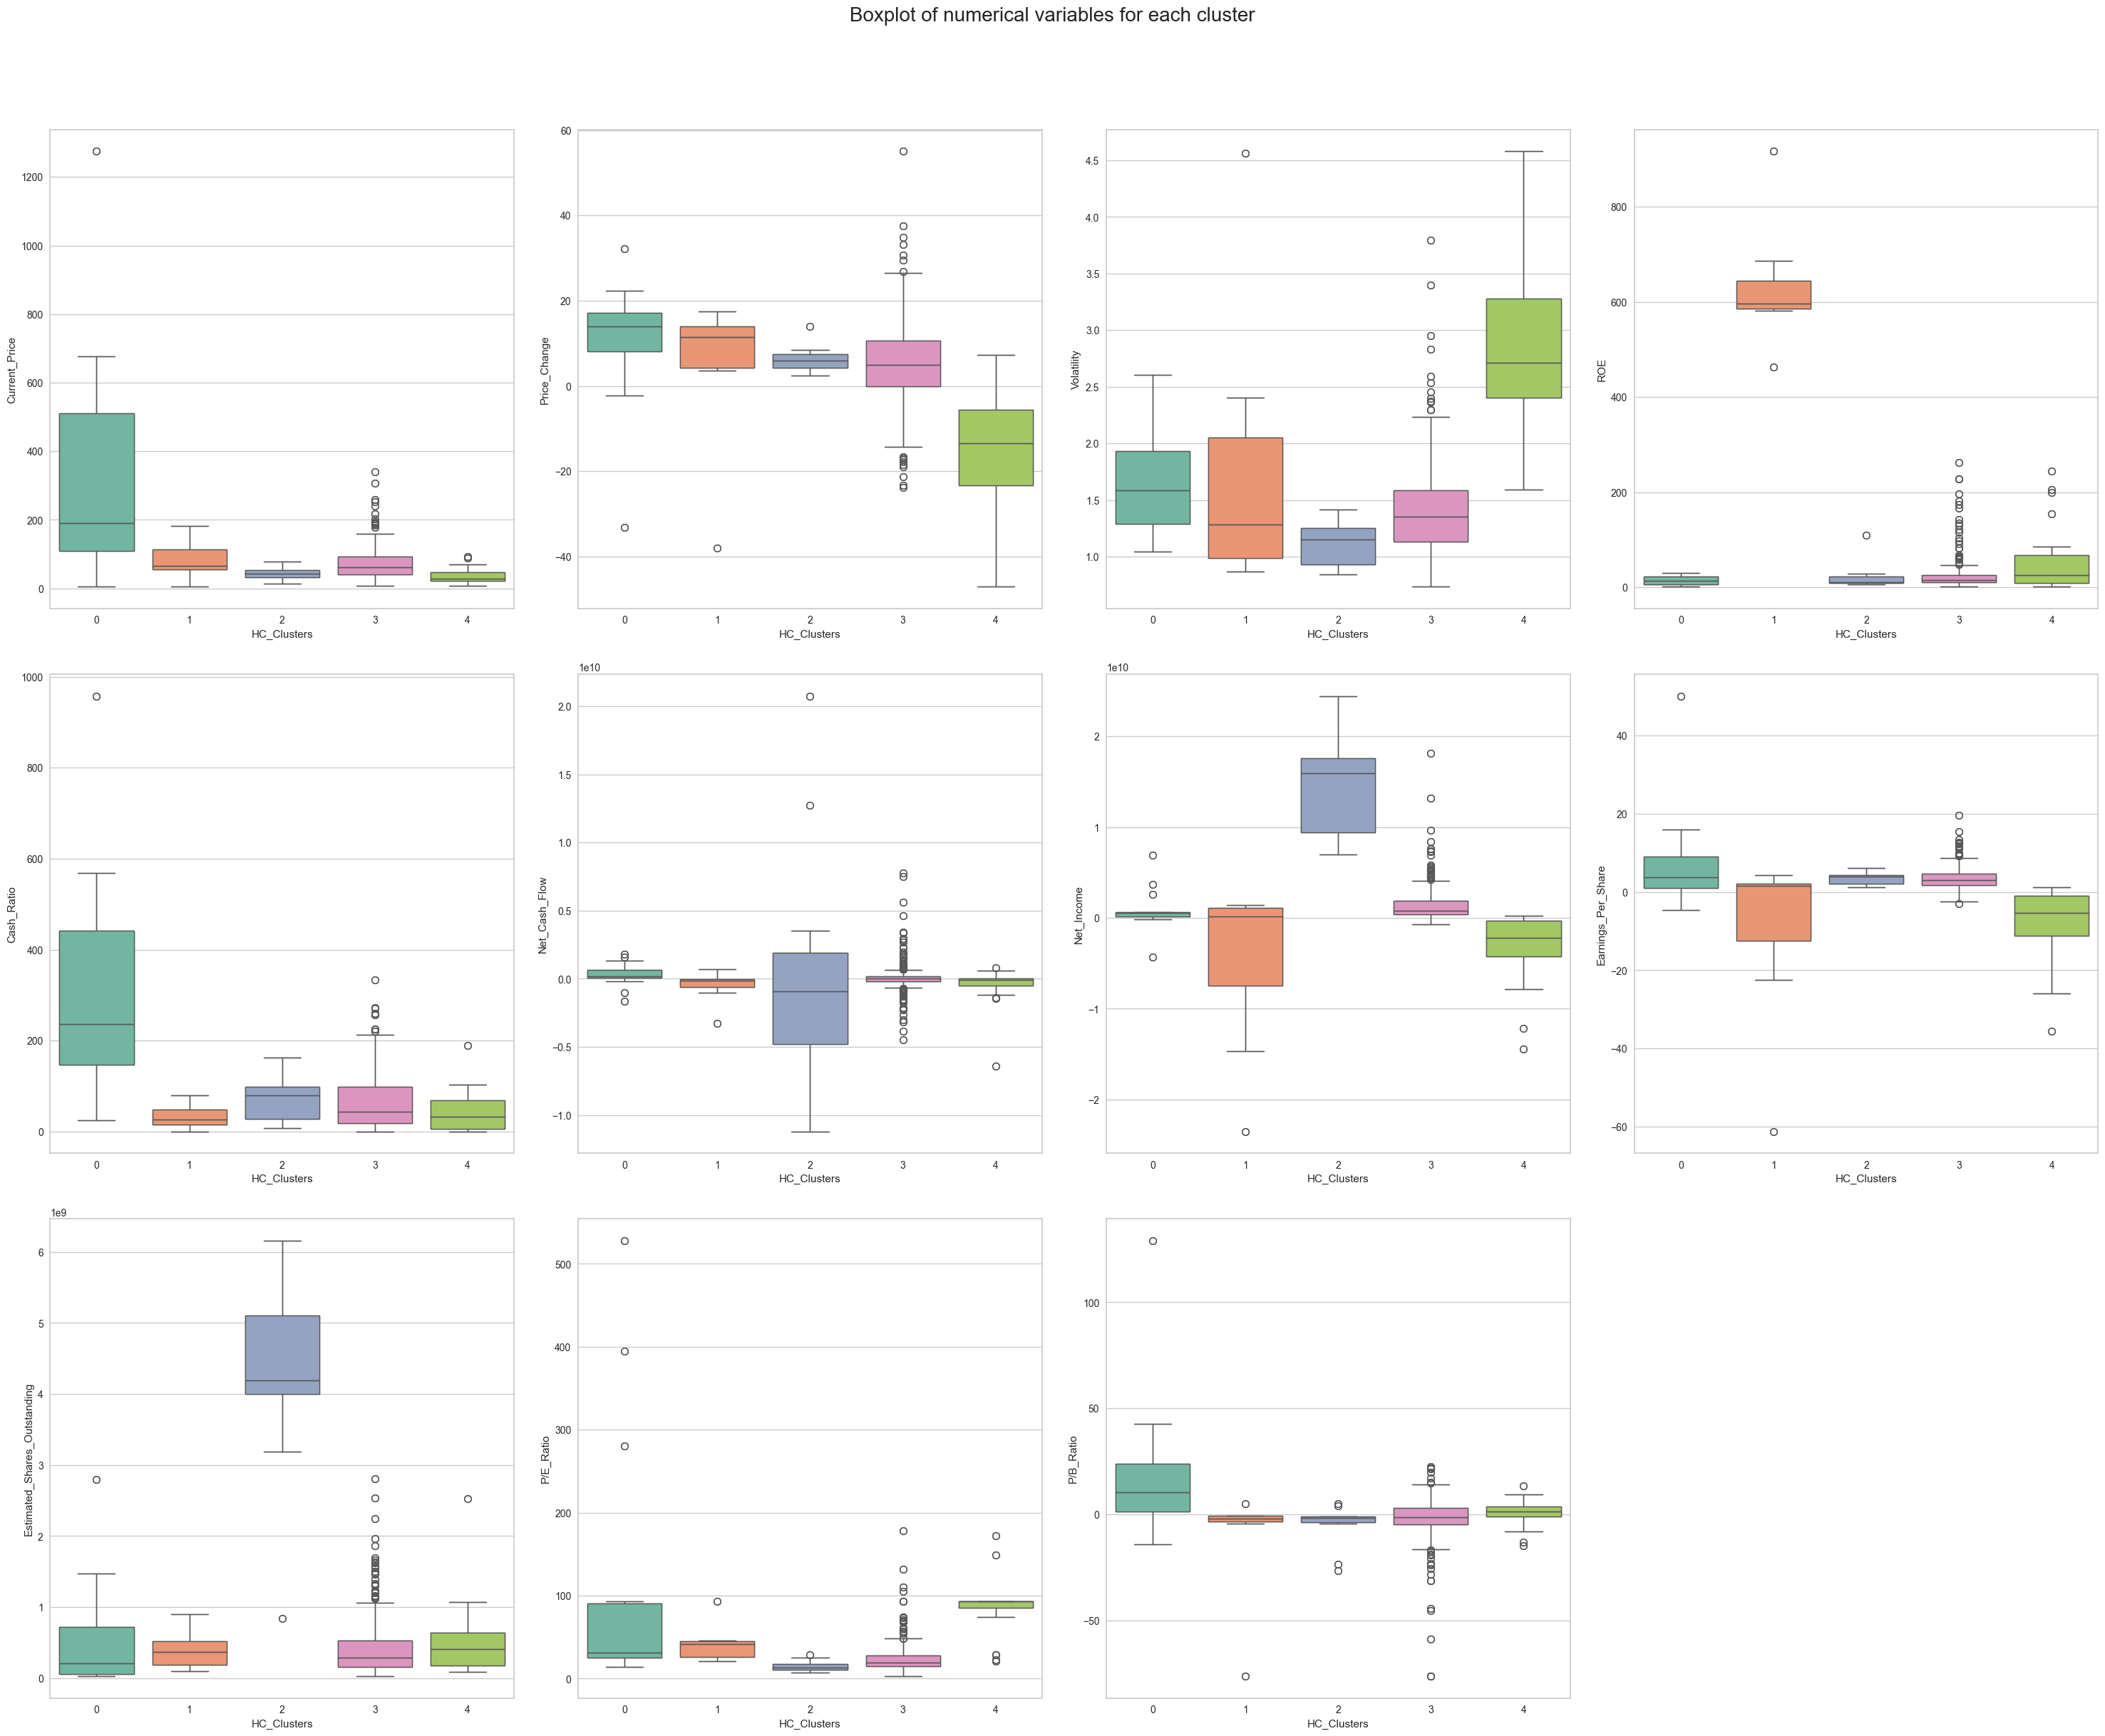

In [58]:
# Dynamically calculate the number of rows and columns for subplots
n_cols = 4  # Number of plots per row
n_rows = (len(num_col) + n_cols - 1) // n_cols  # Calculate required rows

fig, axes = plt.subplots(n_rows, n_cols, figsize=(30, 25))
axes = axes.flatten()  # Flatten the axes array for easy iteration

fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)

for ii, col in enumerate(num_col):
    sns.boxplot(
        ax=axes[ii],
        y=df_3[col],
        x=df_3["HC_Clusters"],
        palette='Spectral'
    )

# Hide any unused subplots
for jj in range(len(num_col), len(axes)):
    fig.delaxes(axes[jj])

# Adjust layout to display 4 plots per row
fig.tight_layout(pad=2.0, rect=[0, 0, 1, 0.95])
axes = axes.flatten()
fig.suptitle("Boxplot of numerical variables for each cluster", fontsize=20)

for ii, col in enumerate(num_col):
    sns.boxplot(
        ax=axes[ii],
        y=df_3[col],
        x=df_3["HC_Clusters"],
        palette="Set2"
    )

# Adjust layout to display 4 or 5 plots per row
fig.tight_layout(pad=2.0, rect=[0, 0, 1, 0.95])

In [59]:
# List of companies (Security) on each cluster
lists = df_3.groupby('HC_Clusters')['Security'].apply(list)
# Printing the names of the securities in each cluster
for i in range(len(lists)):
    print(f'On Cluster {i}: there are {len(lists[i])} securities')
    print(f'Cluster {i}: {lists[i]}')

On Cluster 0: there are 15 securities
Cluster 0: ['Alliance Data Systems', 'Alexion Pharmaceuticals', 'Amgen Inc', 'Amazon.com Inc', 'Chipotle Mexican Grill', 'Equinix', 'Facebook', 'Frontier Communications', 'Intuitive Surgical Inc.', 'Monster Beverage', 'Netflix Inc.', 'Priceline.com Inc', 'Regeneron', 'Waters Corporation', 'Yahoo Inc.']
On Cluster 1: there are 7 securities
Cluster 1: ['Allegion', 'Apache Corporation', 'Chesapeake Energy', 'Charter Communications', 'Colgate-Palmolive', 'Kimberly-Clark', 'S&P Global, Inc.']
On Cluster 2: there are 11 securities
Cluster 2: ['Bank of America Corp', 'Citigroup Inc.', 'Ford Motor', 'Intel Corp.', 'JPMorgan Chase & Co.', 'Coca Cola Company', 'Pfizer Inc.', 'AT&T Inc', 'Verizon Communications', 'Wells Fargo', 'Exxon Mobil Corp.']
On Cluster 3: there are 285 securities
Cluster 3: ['American Airlines Group', 'AbbVie', 'Abbott Laboratories', 'Adobe Systems Inc', 'Analog Devices, Inc.', 'Archer-Daniels-Midland Co', 'Ameren Corp', 'American Elec

## K-means vs Hierarchical Clustering

You compare several things, like:
- Which clustering technique took less time for execution?

 Our HC model took less time to process (3.3ms while the K-Means model took 3.47ms), but the time difference was minimal with this dataset. Bigger datasets can show a real difference in the execution time.
- Which clustering technique gave you more distinct clusters, or are they the same?

Hierarchical model gave more distint clusters, but some of the clusters are similar. 
- How many observations are there in the similar clusters of both algorithms?

Cluster 0 and cluster 1 of both models seem to be similar (295 stocks on the K-Means model and 275 stocks on cluster 1)
- How many clusters are obtained as the appropriate number of clusters from both algorithms?

For K-means we went with 4 cluster, while for the HC model we used 5 Clusters.

## Actionable Insights and Recommendations

- Based on our analysis, we found two possible methods to cluster the stocks: one using K-Means clustering and another using Hierarchical clustering.

- For the K-Means clustering model (K-Means Model), we identified 4 different clusters with the following characteristics:
0) Cluster 0: Stocks with the highest average current price.
1) Cluster 1: Stocks with the highest net cash flow, P/E ratio, and P/B ratio.
2) Cluster 2: Stocks with the highest volatility and ROE.
3) Cluster 3: Stocks with the highest price change, cash ratio, net income, earnings per share, and estimated shares outstanding.

- For the Hierarchical Clustering (HC Model) method, we identified 5 clusters with these characteristics:

0) Cluster 0: Stocks with the highest average current price, price change, cash ratio, net cash flow, earnings per share, and P/B ratio.
1) Cluster 1: Stocks in this group do not have any notable characteristics; most unclassified stocks are placed here.
2) Cluster 2: Stocks with the highest ROE.
3) Cluster 3: Stocks with the highest net income and estimated shares outstanding.
4) Cluster 4: Stocks with the highest volatility and P/E ratio.

Our models have different ways to separate and cluster the stocks as described before, so as a summary, the amount of stocks assigned to each cluster are the following:

K-means

0) Cluster 0 --> 295 Stocks
1) Cluster 1 --> 32 Stocks
2) Cluster 2 --> 2 Stocks
3) Cluster 3 --> 11 Stocks

HC:

0) Cluster 0 --> 27 Stocks
1) Cluster 1 --> 275 Stocks
2) Cluster 2 --> 7 Stocks
3) Cluster 3 --> 9 stocks
4) Cluster 4 --> 22 Stocks

- Based on these results, the firm can recommend investments in specific groups of stocks depending on the classification and expected outcomes.

Recommendations:

 - Both models identify Cluster 0 as having the highest current price and low volatility, making it a relatively safe investment. However, the HC model shows higher earnings per share in this group compared to the K-Means model (e.g., Adobe Systems Inc., Alliance Data).

 - Clusters 1 and 2 in the K-Means model and Clusters 2 and 4 in the HC model appear to be less favorable investments, as these groups have negative average earnings per share (e.g., Anadarko Petroleum Corp., Baker Hughes Inc., Concho Resources).

 - Regarding price change, Clusters 0 and 3 in both models show positive price increases, making them good investment options (e.g., Adobe Systems Inc., Citigroup Inc., Ford Motor). Conversely, Clusters 1 and 2 in K-Means and Cluster 4 in HC are less favorable due to declining prices (e.g., Concho Resources, Cabot Oil and Gas).

 - Some specific sectors seem to have a higher chance of having a positive price change, while the opposite is expected for the Energy sector.

 - The higher the volatility the higher the risk of a decreasing earning per share and negative price change. 

- Outlier Analysis:

The presence of multiple outliers in the data could affect the accuracy of the analysis. While we mitigated this by scaling the data, further analysis can be done to address outliers more thoroughly (e.g., adjusting their values to align with the dataset or removing them). However, this additional step was not performed since the presented values appear valid.
